# Census Income Project


### Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

-> A single cell estimate of the population 16+ for each state.

-> Controls for Hispanic Origin by age and sex.

-> Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st

import warnings
warnings.filterwarnings('ignore')

In [2]:
# setting the plots style,grid and size
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE554'

In [3]:
# loading the dataset
income = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [4]:
# looking at the shape
income.shape

# There are more than 32 thousand rows and 15 columns

(32560, 15)

In [5]:
# Inorder to view all the columns while printing we are setting an option to display the maximum columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [6]:
# looking at the first 30 rows from the df
income.head(30)

# We can observe that some rows are having question mark ? instead of nan values
# Those indicate missing values
# We have to treat them
# And target column income is having unstructured data, we have to make some changes to it for building the model

Age          Workclass  Fnlwgt      Education  Education_num  \
0    50   Self-emp-not-inc   83311      Bachelors             13   
1    38            Private  215646        HS-grad              9   
2    53            Private  234721           11th              7   
3    28            Private  338409      Bachelors             13   
4    37            Private  284582        Masters             14   
5    49            Private  160187            9th              5   
6    52   Self-emp-not-inc  209642        HS-grad              9   
7    31            Private   45781        Masters             14   
8    42            Private  159449      Bachelors             13   
9    37            Private  280464   Some-college             10   
10   30          State-gov  141297      Bachelors             13   
11   23            Private  122272      Bachelors             13   
12   32            Private  205019     Assoc-acdm             12   
13   40            Private  121772      Assoc-voc             11   
14   34            Private  245487        7th-8th              4   
15   25   Self-emp-not-inc  176756        HS-grad              9   
16   32            Private  186824        HS-grad              9   
17   38            Private   28887           11th              7   
18   43   Self-emp-not-inc  292175        Masters             14   
19   40            Private  193524      Doctorate             16   
20   54            Private  302146        HS-grad              9   
21   35        Federal-gov   76845            9th              5   
22   43            Private  117037           11th              7   
23   59            Private  109015        HS-grad              9   
24   56          Local-gov  216851      Bachelors             13   
25   19            Private  168294        HS-grad              9   
26   54                  ?  180211   Some-college             10   
27   39            Private  367260        HS-grad              9   
28   49            Private  193366        HS-grad              9   
29   23          Local-gov  190709     Assoc-acdm             12   

            Marital_status          Occupation    Relationship  \
0       Married-civ-spouse     Exec-managerial         Husband   
1                 Divorced   Handlers-cleaners   Not-in-family   
2       Married-civ-spouse   Handlers-cleaners         Husband   
3       Married-civ-spouse      Prof-specialty            Wife   
4       Married-civ-spouse     Exec-managerial            Wife   
5    Married-spouse-absent       Other-service   Not-in-family   
6       Married-civ-spouse     Exec-managerial         Husband   
7            Never-married      Prof-specialty   Not-in-family   
8       Married-civ-spouse     Exec-managerial         Husband   
9       Married-civ-spouse     Exec-managerial         Husband   
10      Married-civ-spouse      Prof-specialty         Husband   
11           Never-married        Adm-clerical       Own-child   
12           Never-married               Sales   Not-in-family   
13      Married-civ-spouse        Craft-repair         Husband   
14      Married-civ-spouse    Transport-moving         Husband   
15           Never-married     Farming-fishing       Own-child   
16           Never-married   Machine-op-inspct       Unmarried   
17      Married-civ-spouse               Sales         Husband   
18                Divorced     Exec-managerial       Unmarried   
19      Married-civ-spouse      Prof-specialty         Husband   
20               Separated       Other-service       Unmarried   
21      Married-civ-spouse     Farming-fishing         Husband   
22      Married-civ-spouse    Transport-moving         Husband   
23                Divorced        Tech-support       Unmarried   
24      Married-civ-spouse        Tech-support         Husband   
25           Never-married        Craft-repair       Own-child   
26      Married-civ-spouse                   ?         Husband   
27                Divorced     Exec-managerial 

In [7]:
# looking at the last 30 rows from the df
income.tail(30)

# Also there are alot of zeroes 0 in capital gain and loss column

Age          Workclass  Fnlwgt      Education  Education_num  \
32530   30                  ?   33811      Bachelors             13   
32531   34            Private  204461      Doctorate             16   
32532   54            Private  337992      Bachelors             13   
32533   37            Private  179137   Some-college             10   
32534   22            Private  325033           12th              8   
32535   34            Private  160216      Bachelors             13   
32536   30            Private  345898        HS-grad              9   
32537   38            Private  139180      Bachelors             13   
32538   71                  ?  287372      Doctorate             16   
32539   45          State-gov  252208        HS-grad              9   
32540   41                  ?  202822        HS-grad              9   
32541   72                  ?  129912        HS-grad              9   
32542   45          Local-gov  119199     Assoc-acdm             12   
32543   31            Private  199655        Masters             14   
32544   39          Local-gov  111499     Assoc-acdm             12   
32545   37            Private  198216     Assoc-acdm             12   
32546   43            Private  260761        HS-grad              9   
32547   65   Self-emp-not-inc   99359    Prof-school             15   
32548   43          State-gov  255835   Some-college             10   
32549   43   Self-emp-not-inc   27242   Some-college             10   
32550   32            Private   34066           10th              6   
32551   43            Private   84661      Assoc-voc             11   
32552   32            Private  116138        Masters             14   
32553   53            Private  321865        Masters             14   
32554   22            Private  310152   Some-college             10   
32555   27            Private  257302     Assoc-acdm             12   
32556   40            Private  154374        HS-grad              9   
32557   58            Private  151910        HS-grad              9   
32558   22            Private  201490        HS-grad              9   
32559   52       Self-emp-inc  287927        HS-grad              9   

            Marital_status          Occupation     Relationship  \
32530        Never-married                   ?    Not-in-family   
32531   Married-civ-spouse      Prof-specialty          Husband   
32532   Married-civ-spouse     Exec-managerial          Husband   
32533             Divorced        Adm-clerical        Unmarried   
32534        Never-married     Protective-serv        Own-child   
32535        Never-married     Exec-managerial    Not-in-family   
32536        Never-married        Craft-repair    Not-in-family   
32537             Divorced      Prof-specialty        Unmarried   
32538   Married-civ-spouse                   ?          Husband   
32539            Separated        Adm-clerical        Own-child   
32540            Separated                   ?    Not-in-family   
32541   Married-civ-spouse                   ?          Husband   
32542             Divorced      Prof-specialty        Unmarried   
32543             Divorced       Other-service    Not-in-family   
32544   Married-civ-spouse        Adm-clerical             Wife   
32545             Divorced        Tech-support    Not-in-family   
32546   Married-civ-spouse   Machine-op-inspct          Husband   
32547        Never-married      Prof-specialty    Not-in-family   
32548             Divorced        Adm-clerical   Other-relative   
32549   Married-civ-spouse        Craft-repair          Husband   
32550   Married-civ-spouse   Handlers-cleaners          Husband   
32551   Married-civ-spouse               Sales          Husband   
32552        Never-married        Tech-support    Not-in-family   
32553   Married-civ-spouse     Exec-managerial          Husband   
32554        Never-married     Protective-serv    Not-in-family   
32555   Married-civ-spouse        Tech-support             Wife

In [8]:
# looking at the 30 random rows from the df
income.sample(30)

Age          Workclass  Fnlwgt      Education  Education_num  \
30565   47            Private   46044        Masters             14   
16626   37   Self-emp-not-inc  265266    Prof-school             15   
24094   52          State-gov  135388        HS-grad              9   
19939   47            Private  161311        HS-grad              9   
31442   30          State-gov   54318           11th              7   
25777   46            Private  182715        7th-8th              4   
3548    25            Private  251915      Bachelors             13   
24238   35            Private  168322           11th              7   
22624   25            Private  404951      Bachelors             13   
10120   28            Private  421967      Bachelors             13   
22983   56            Private  193453      Bachelors             13   
24327   52            Private   35305        7th-8th              4   
28007   42            Private  202565        1st-4th              2   
26648   26            Private  190650      Bachelors             13   
11130   22            Private  181313      Assoc-voc             11   
21992   57            Private  190997      Bachelors             13   
14221   56   Self-emp-not-inc  210731        7th-8th              4   
27348   52            Private  222405        HS-grad              9   
32153   34            Private  115040        HS-grad              9   
15834   29            Private  150861        HS-grad              9   
7616    34            Private   77271        HS-grad              9   
19397   34            Private  118551      Bachelors             13   
13843   24            Private  346909        HS-grad              9   
16166   47            Private  329144        HS-grad              9   
20726   20            Private  211293   Some-college             10   
16438   35            Private  186126        Masters             14   
390     27            Private  301302      Bachelors             13   
29287   19            Private  100790        HS-grad              9   
16644   49          Local-gov  159641      Bachelors             13   
9953    32            Private  130057        HS-grad              9   

            Marital_status          Occupation     Relationship  \
30565   Married-civ-spouse     Exec-managerial          Husband   
16626   Married-civ-spouse      Prof-specialty          Husband   
24094   Married-civ-spouse        Craft-repair          Husband   
19939             Divorced   Machine-op-inspct        Unmarried   
31442   Married-civ-spouse    Transport-moving          Husband   
25777             Divorced     Exec-managerial    Not-in-family   
3548         Never-married               Sales        Own-child   
24238   Married-civ-spouse     Farming-fishing          Husband   
22624        Never-married     Exec-managerial    Not-in-family   
10120   Married-civ-spouse     Exec-managerial             Wife   
22983   Married-civ-spouse      Prof-specialty          Husband   
24327        Never-married       Other-service        Own-child   
28007   Married-civ-spouse   Machine-op-inspct          Husband   
26648        Never-married        Adm-clerical        Own-child   
11130        Never-married       Other-service    Not-in-family   
21992   Married-civ-spouse     Exec-managerial          Husband   
14221             Divorced               Sales   Other-relative   
27348   Married-civ-spouse               Sales          Husband   
32153   Married-civ-spouse        Craft-repair          Husband   
15834        Never-married        Adm-clerical    Not-in-family   
7616         Never-married     Exec-managerial        Unmarried   
19397        Never-married        Tech-support    Not-in-family   
13843   Married-civ-spouse        Craft-repair          Husband   
16166   Married-civ-spouse               Sales          Husband   
20726        Never-married               Sales        Own-child   
16438   Married-civ-spouse      Prof-specialty          Husband

In [9]:
# looking at the columns
income.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [10]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
# dtypes
income.dtypes
# There are 10 categorical and 5 continuous variables

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [12]:
### Checking the null values
income.isnull().sum()

# Although it is showing there are no null values we know that the null values or missing values in this dataset are replaced by ?

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [13]:
# First lets the number of values with question mark ? in each column
(income == ' ?').sum() # we have given some space for ? because it has been located at the end of the row in each column

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [14]:
# Now lets replace the ? with null null values using np.nan
income.replace({' ?': np.nan},inplace=True)

In [15]:
# Now lets check the null values again
income.isnull().sum()

# We can see that the ? are replaced with nan values
# There are three columns with null values

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [16]:
income.isnull().sum().sum()

# There 

4262

In [17]:
income.isnull().sum().sum()/32560*100

# There will be 13% dataloss if we want to drop the null values

13.089680589680588

<AxesSubplot:>

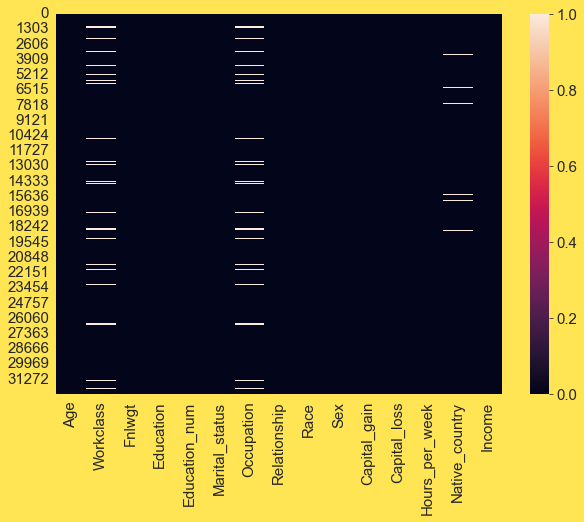

In [18]:
# plotting a heatmap 
sns.heatmap(income.isnull())

In [19]:
# checking the % of null values in each column
for i in income.columns:
    print('% of null values in',i,': ',income[i].isnull().sum()/32560*100,'dtype: ',income[i].dtype)
    
# We can observe there around 5% missing data in Workclass and Occupation
# And around 1.7 % in Native_country
# All the missing value columns are categorical

% of null values in Age :  0.0 dtype:  int64
% of null values in Workclass :  5.638820638820639 dtype:  object
% of null values in Fnlwgt :  0.0 dtype:  int64
% of null values in Education :  0.0 dtype:  object
% of null values in Education_num :  0.0 dtype:  int64
% of null values in Marital_status :  0.0 dtype:  object
% of null values in Occupation :  5.66031941031941 dtype:  object
% of null values in Relationship :  0.0 dtype:  object
% of null values in Race :  0.0 dtype:  object
% of null values in Sex :  0.0 dtype:  object
% of null values in Capital_gain :  0.0 dtype:  int64
% of null values in Capital_loss :  0.0 dtype:  int64
% of null values in Hours_per_week :  0.0 dtype:  int64
% of null values in Native_country :  1.7905405405405406 dtype:  object
% of null values in Income :  0.0 dtype:  object


In [20]:
# checking the unique values
income.nunique()

Age                  73
Workclass             8
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           14
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       41
Income                2
dtype: int64

In [21]:
# treating categorical null values
# let's find the mode of the categorical variables which have null values
cat_nulls = ['Workclass','Occupation','Native_country']
for i in cat_nulls:
    print('Mode of',i,'is',income[i].mode()[0])

# We can just fill the null values with mode because the % of null values is less 
# And this can be the ideal method to fill the null values without any impact on the original data

Mode of Workclass is  Private
Mode of Occupation is  Prof-specialty
Mode of Native_country is  United-States


In [22]:
# looking at the unique values in each null column
for i in cat_nulls:
    print(income[i].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64
 United-States                 29169
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England    

In [23]:
# since our data is categorical and the null values are upto 5% we are going to fill the null values with mode of the columns
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose=0)

In [24]:
# Since native country has only 1.6% null values we are imputing it with its mode 
# fitting the imputer first
si = si.fit(income[['Native_country']])

In [25]:
# transforming 
income[['Native_country']] = si.transform(income[['Native_country']])

In [26]:
# checking the null values in 
income['Native_country'].isnull().sum()

0

In [27]:
#checking the % share of most frequently occuring value of Occupation

(income['Occupation'] == ' Prof-specialty').sum()/income.Occupation.count()*100

13.477878699091708

In [28]:
#checking the % share of most frequently occuring value of Occupation

(income['Workclass'] == ' Private').sum()/income.Workclass.count()*100

73.87058976695742

In [29]:
# We can see that the  workclass has mode value more than 75% so we can impute the missing values with mode
# and occupation as well
income["Workclass"] = income["Workclass"].fillna(income['Workclass'].mode()[0])
income["Occupation"] = income["Occupation"].fillna(income['Occupation'].mode()[0])


In [30]:
income.isnull().sum()

# Now we in occupation the  mode is contributing only 13.4% to the occupation, so in this case it is better if we drop the null values 

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [31]:
income.isnull().sum()
# Now we can see that that there are no null values

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [32]:
# checking if there are any duplicates in the data
duplicates = income[income.duplicated()]
duplicates.shape

# We can see that there are 24 duplicate rows
# We will drop them

(24, 15)

In [33]:
income.drop_duplicates(inplace=True)

In [34]:
income.shape

(32536, 15)

## EDA

In [35]:
income.describe().T

# We can see that the data is skewed in fnlwgt and other columns 
# Also nthere are many 0 values in capital_gain and loss columns

count           mean            std      min       25%  \
Age             32536.0      38.585536      13.638193     17.0      28.0   
Fnlwgt          32536.0  189784.298992  105556.258211  12285.0  117831.5   
Education_num   32536.0      10.081725       2.571622      1.0       9.0   
Capital_gain    32536.0    1078.410069    7388.068465      0.0       0.0   
Capital_loss    32536.0      87.370912     403.107737      0.0       0.0   
Hours_per_week  32536.0      40.440343      12.347079      1.0      40.0   

                     50%        75%        max  
Age                 37.0      48.00       90.0  
Fnlwgt          178356.0  236993.25  1484705.0  
Education_num       10.0      12.00       16.0  
Capital_gain         0.0       0.00    99999.0  
Capital_loss         0.0       0.00     4356.0  
Hours_per_week      40.0      45.00       99.0

In [36]:
income.describe(include='O').T

#  most of the data in income is pf less than 50k earning people
# we have to balance the data of the target income

count unique                  top   freq
Workclass       32536      8              Private  24509
Education       32536     16              HS-grad  10494
Marital_status  32536      7   Married-civ-spouse  14970
Occupation      32536     14       Prof-specialty   5979
Relationship    32536      6              Husband  13187
Race            32536      5                White  27794
Sex             32536      2                 Male  21774
Native_country  32536     41        United-States  29734
Income          32536      2                <=50K  24697

In [37]:
# checking the unique values in the target
income['Income'].value_counts()

# We can see that income is having two categories people with less than or equal to 50 thousand dollars income
# And people with more than 50 thousand dollars income
# We will have to encode them as 0 and 1 afterwards

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64

In [38]:
# We can see that education and education_num columns are same 
# edu_num is just the encoded version of education
# so we can drop the education column after analysis
income[['Education_num', 'Education']].value_counts().\
  reset_index().sort_values(by='Education_num')

Education_num      Education      0
15              1      Preschool     50
14              2        1st-4th    166
13              3        5th-6th    332
8               4        7th-8th    645
10              5            9th    514
7               6           10th    933
5               7           11th   1175
11              8           12th    433
0               9        HS-grad  10494
1              10   Some-college   7282
4              11      Assoc-voc   1382
6              12     Assoc-acdm   1067
2              13      Bachelors   5352
3              14        Masters   1722
9              15    Prof-school    576
12             16      Doctorate    413

In [39]:
income.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [40]:
# seperating the cont and cat columns
cat_cols = income.dtypes[income.dtypes == 'object'].index.tolist()
cat_cols

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [41]:
# We are not considering education_num as a continuous variable because it is nothing but the education column encoded
cont_cols = ['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']
cont_cols

['Age', 'Fnlwgt', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

## Univariate Analysis

 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


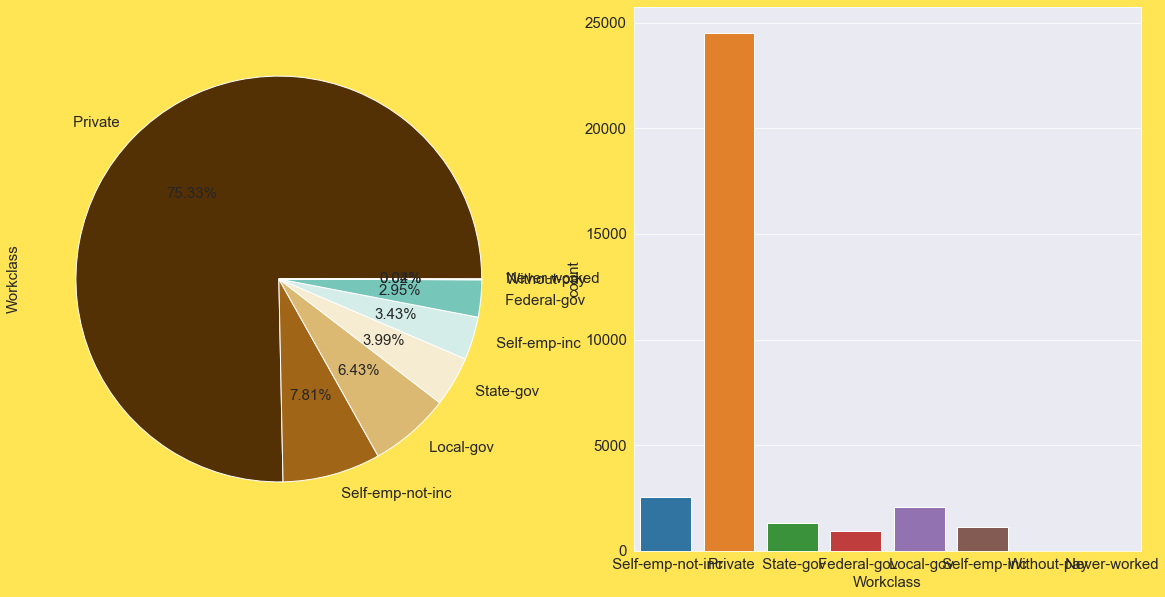

 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64


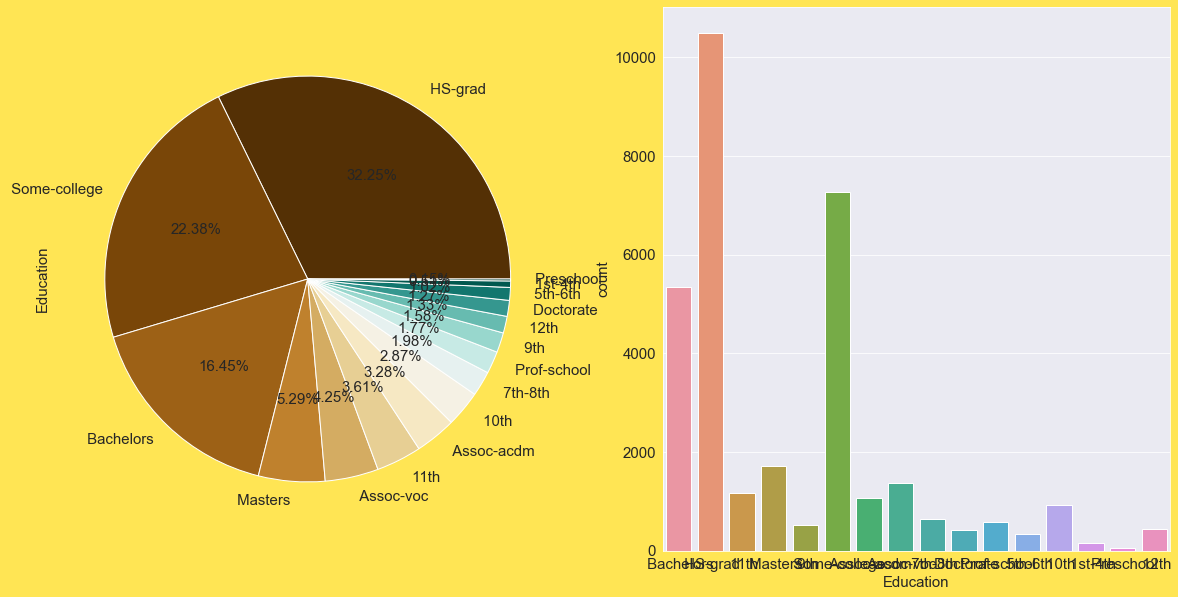

 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


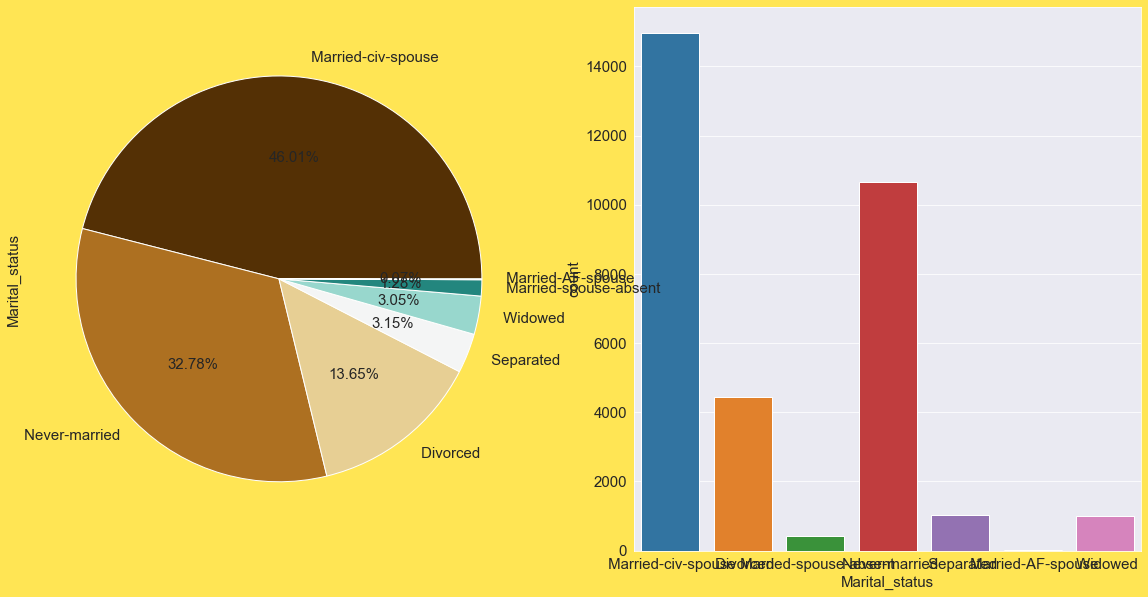

 Prof-specialty       5979
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64


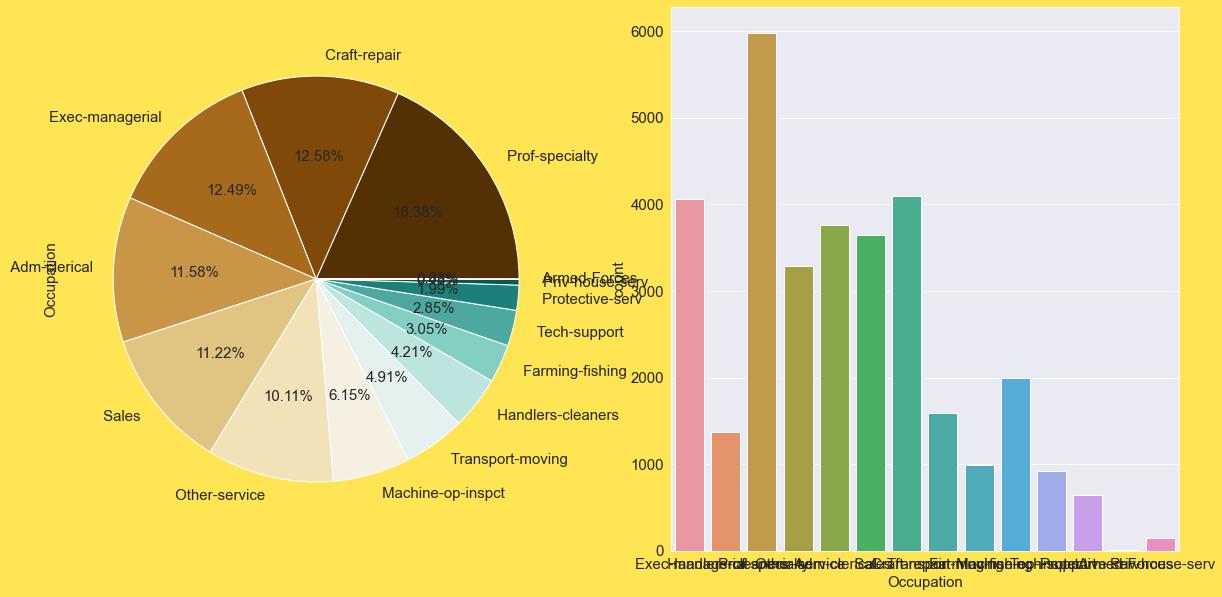

 Husband           13187
 Not-in-family      8291
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


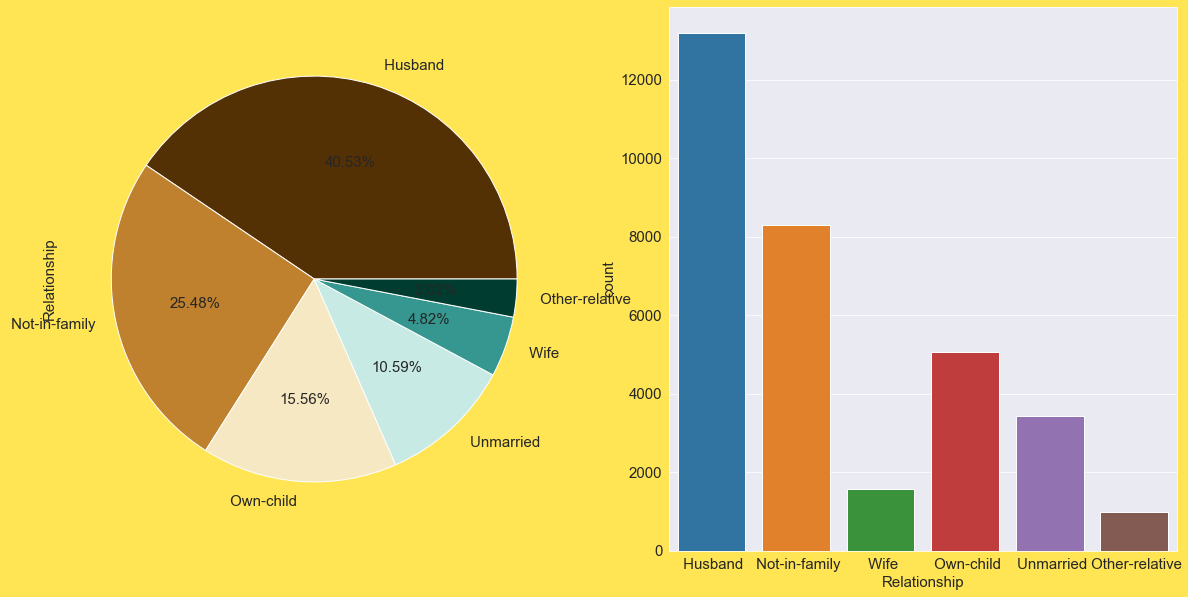

 White                 27794
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


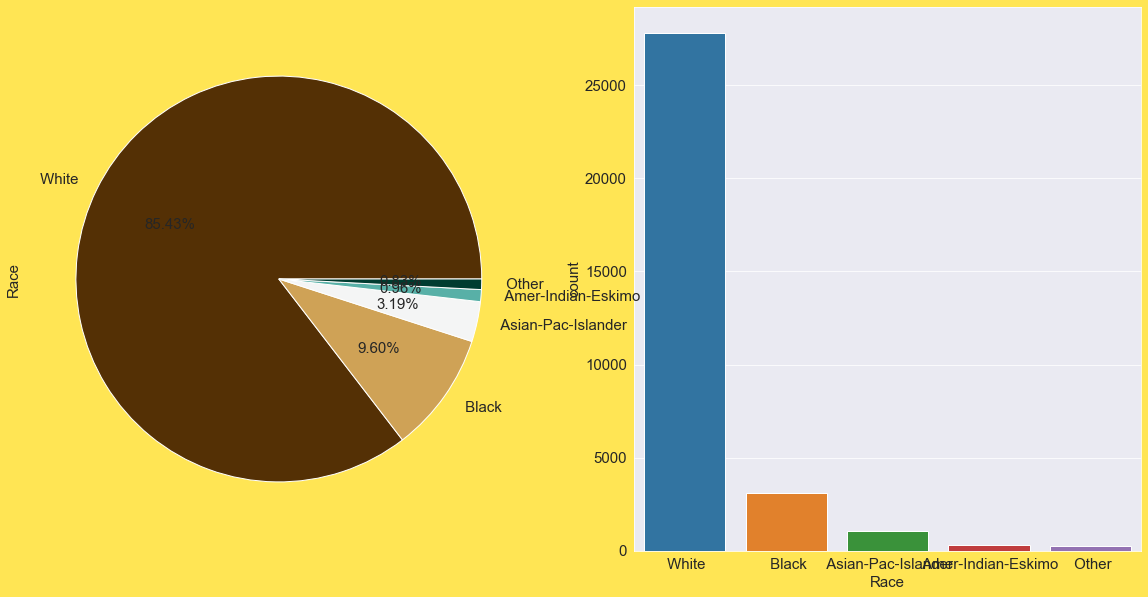

 Male      21774
 Female    10762
Name: Sex, dtype: int64


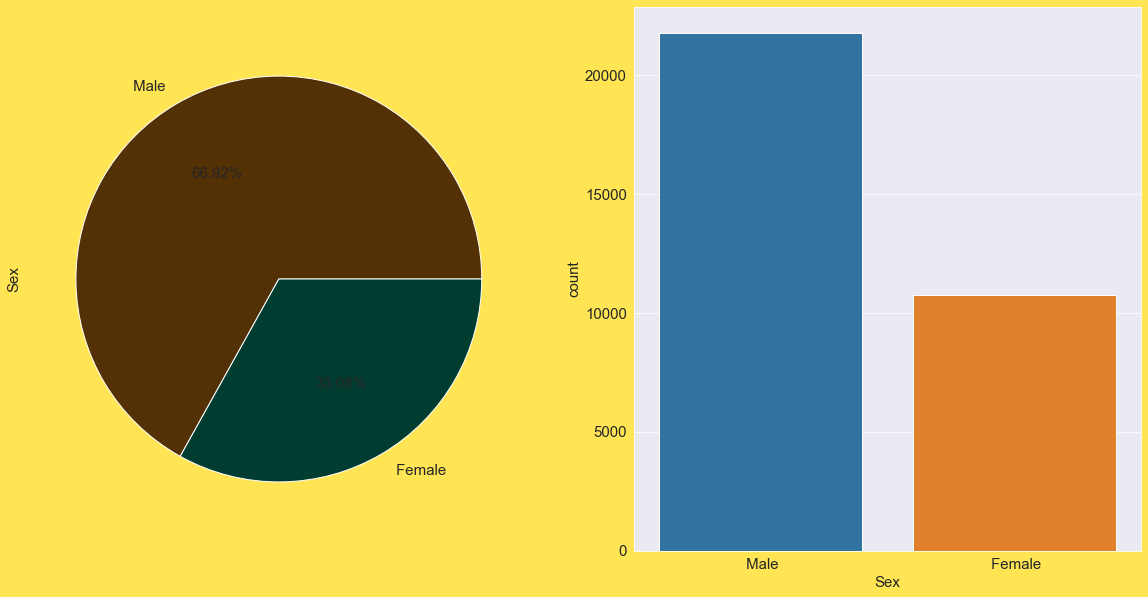

 United-States                 29734
 Mexico                          639
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

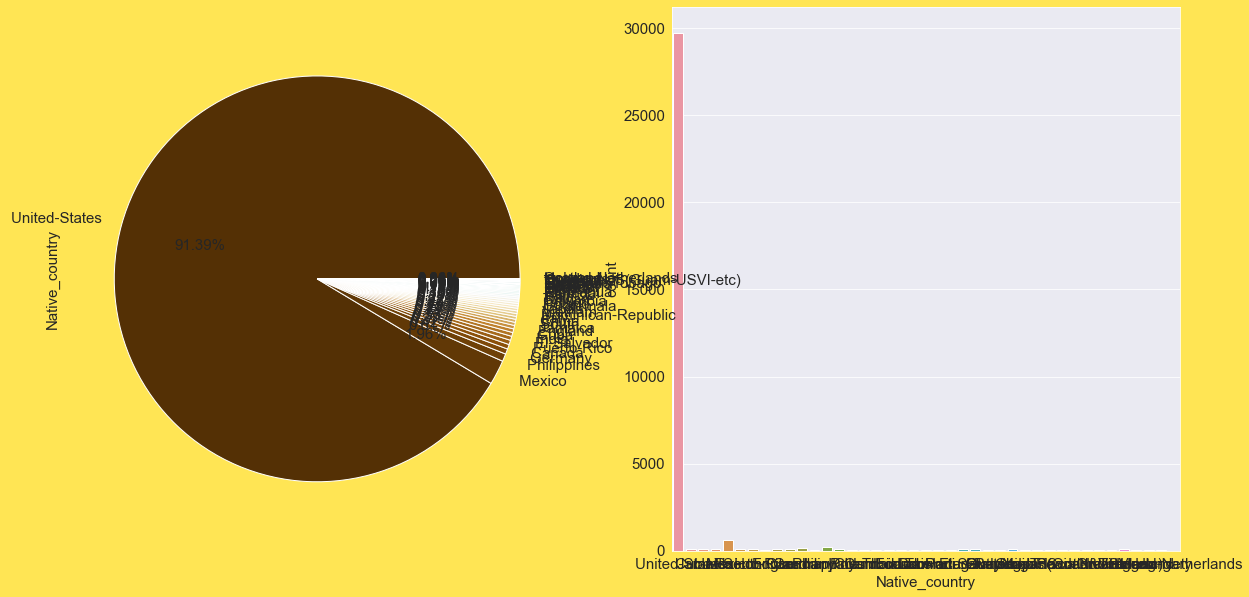

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64


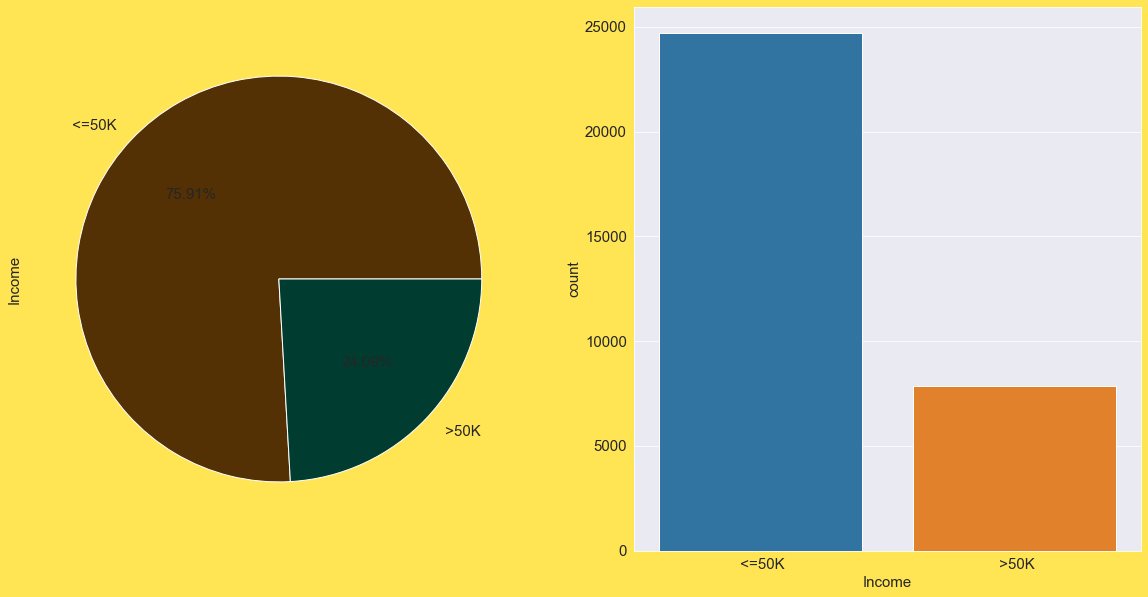

In [42]:
# plotting a bar plot and countplot to look at the catgeories
for i in cat_cols:
    
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,2)
    sns.countplot(i,data=income)
    plt.subplot(1,2,1)
    income[i].value_counts().plot.pie(autopct='%1.2f%%',cmap = 'BrBG')
    print(income[i].value_counts())
    plt.show()


-> We can observe that majority of the workclass are under private

-> HS-grad people are more and only a very few studied doctorate

-> Most of the people are white in Race and majority are americans

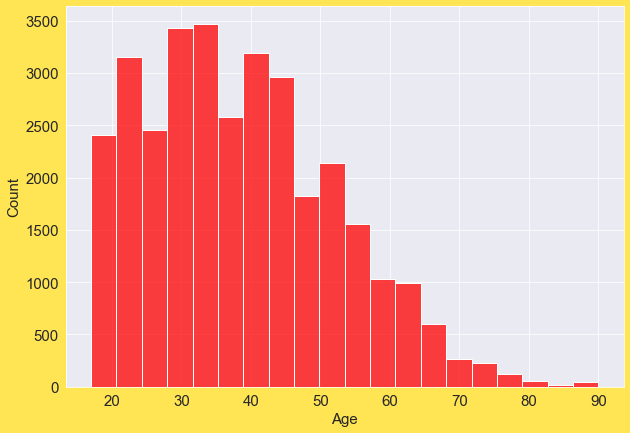

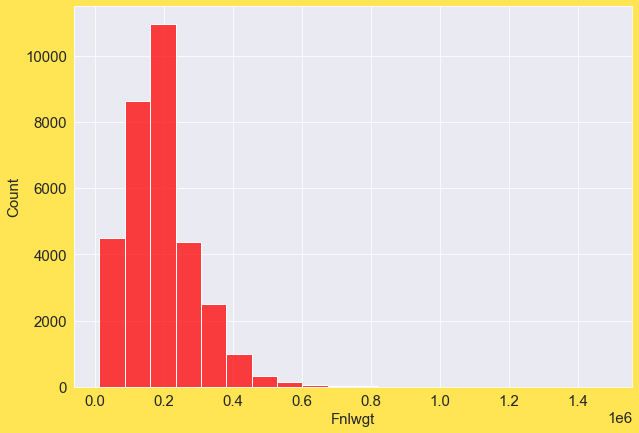

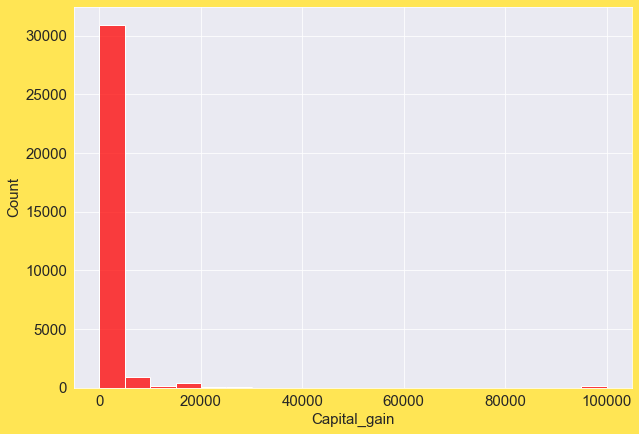

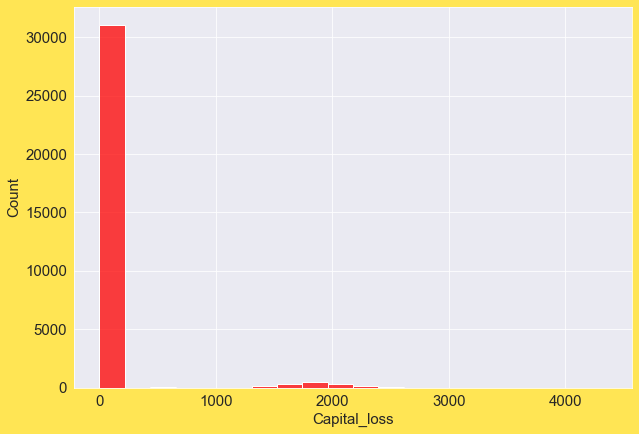

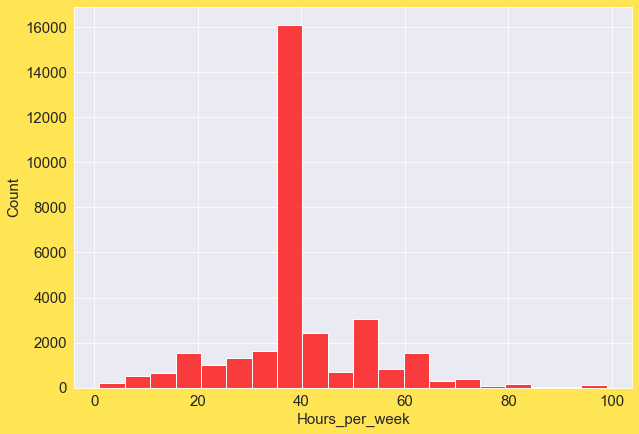

In [43]:
# plotting a histogram to check the values and distribution of cont_cols
for i in cont_cols:
    sns.histplot(income[i],bins=20,color='red')
    plt.show()

-> We can observe that Capital_gain And loss has majority of the values as 0

In [44]:
income['Capital_gain'].value_counts()

# More than 28000 rows are having 0 in capital gain and capital loss as well

0        29825
15024      347
7688       284
7298       246
99999      159
5178        97
3103        97
4386        70
5013        69
8614        55
3325        53
2174        47
10520       43
4064        42
14084       41
4650        41
3137        37
20051       37
27828       34
594         34
3908        32
2829        31
13550       27
6849        27
14344       26
1055        25
2885        24
3411        24
2176        23
4787        23
3464        23
9386        22
2597        20
4101        20
2407        19
4865        17
2202        16
1506        15
3942        14
3674        14
4416        12
2580        12
4508        12
3781        12
10605       12
2463        11
2907        11
5455        11
2354        11
2635        11
25236       11
6497        11
7430         9
2105         9
6418         9
2964         9
2977         8
1151         8
2414         8
3471         8
914          8
4934         7
1831         7
1409         7
1471         7
3818         7
1797      

## Bivariate Analysis

In [45]:
cat_cols

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [46]:
# We are dropping the target Income from the cat cols for analysing the features
cat_cols.pop(8)

'Income'

In [47]:
cat_cols # it is dropped

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country']

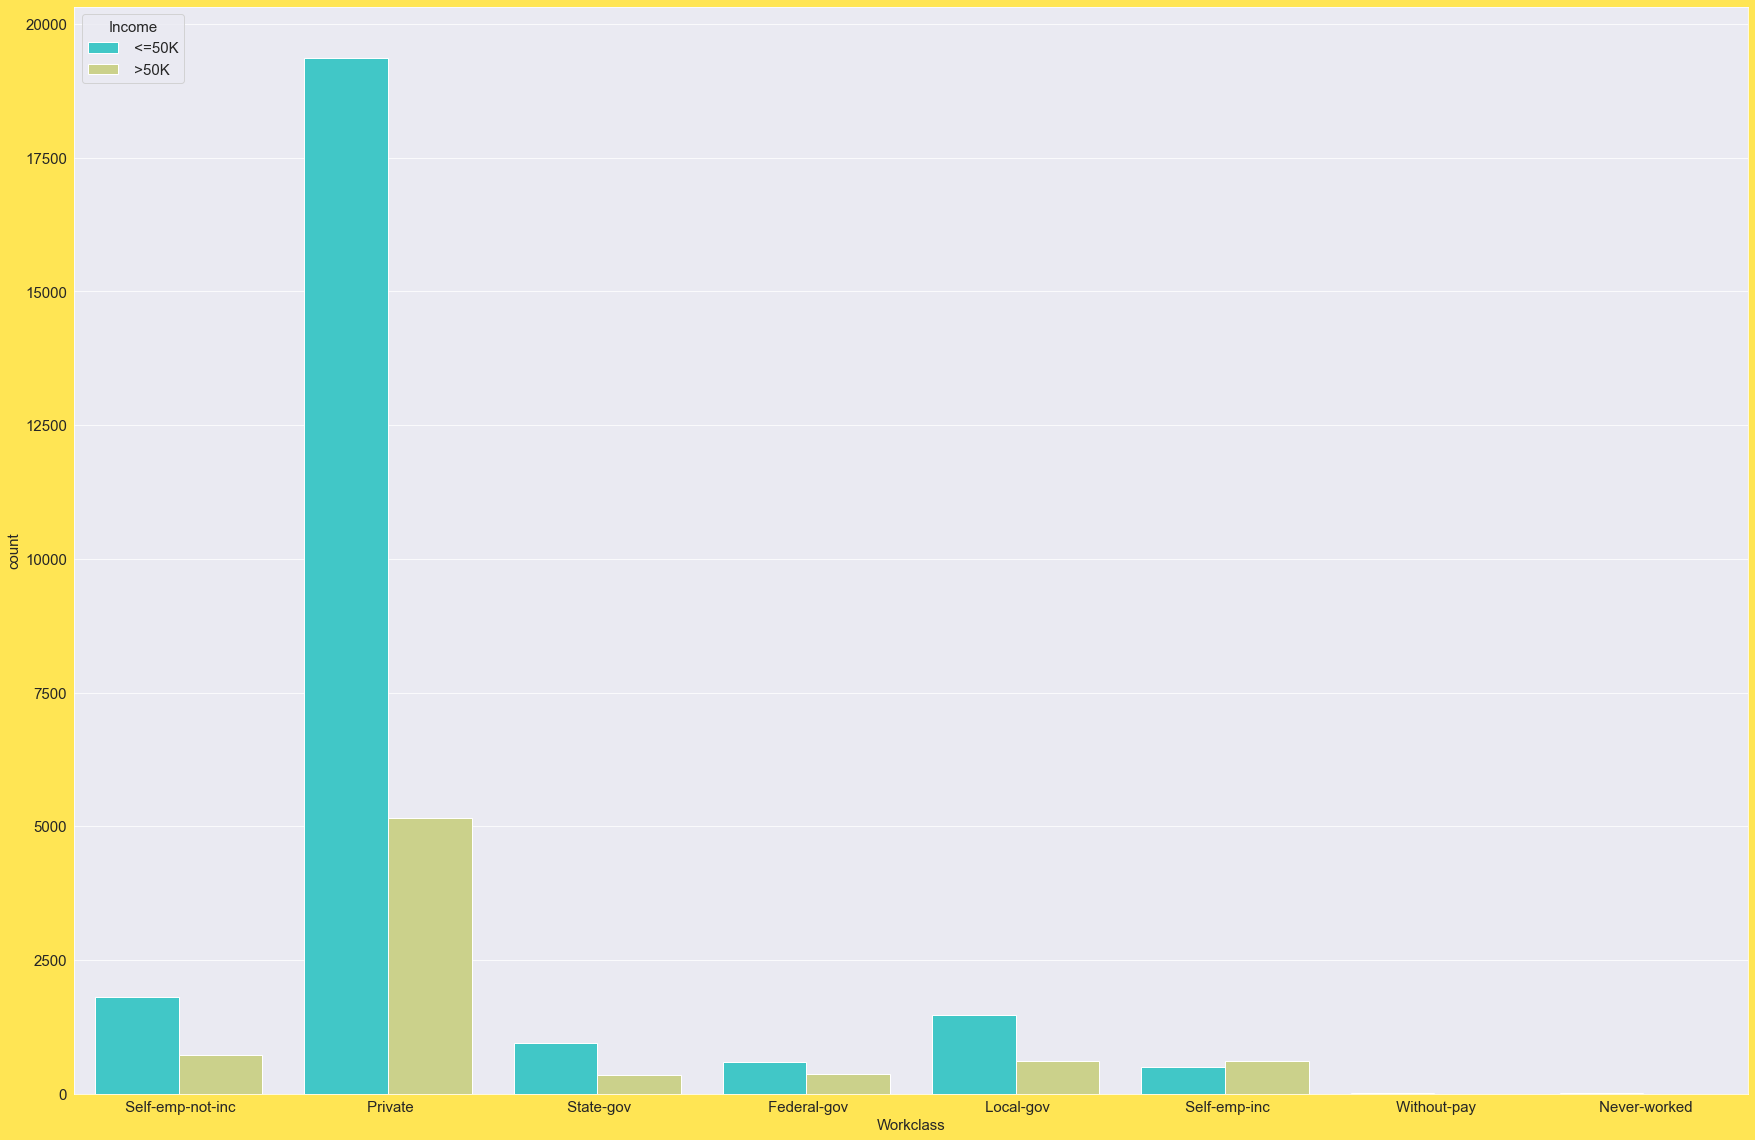

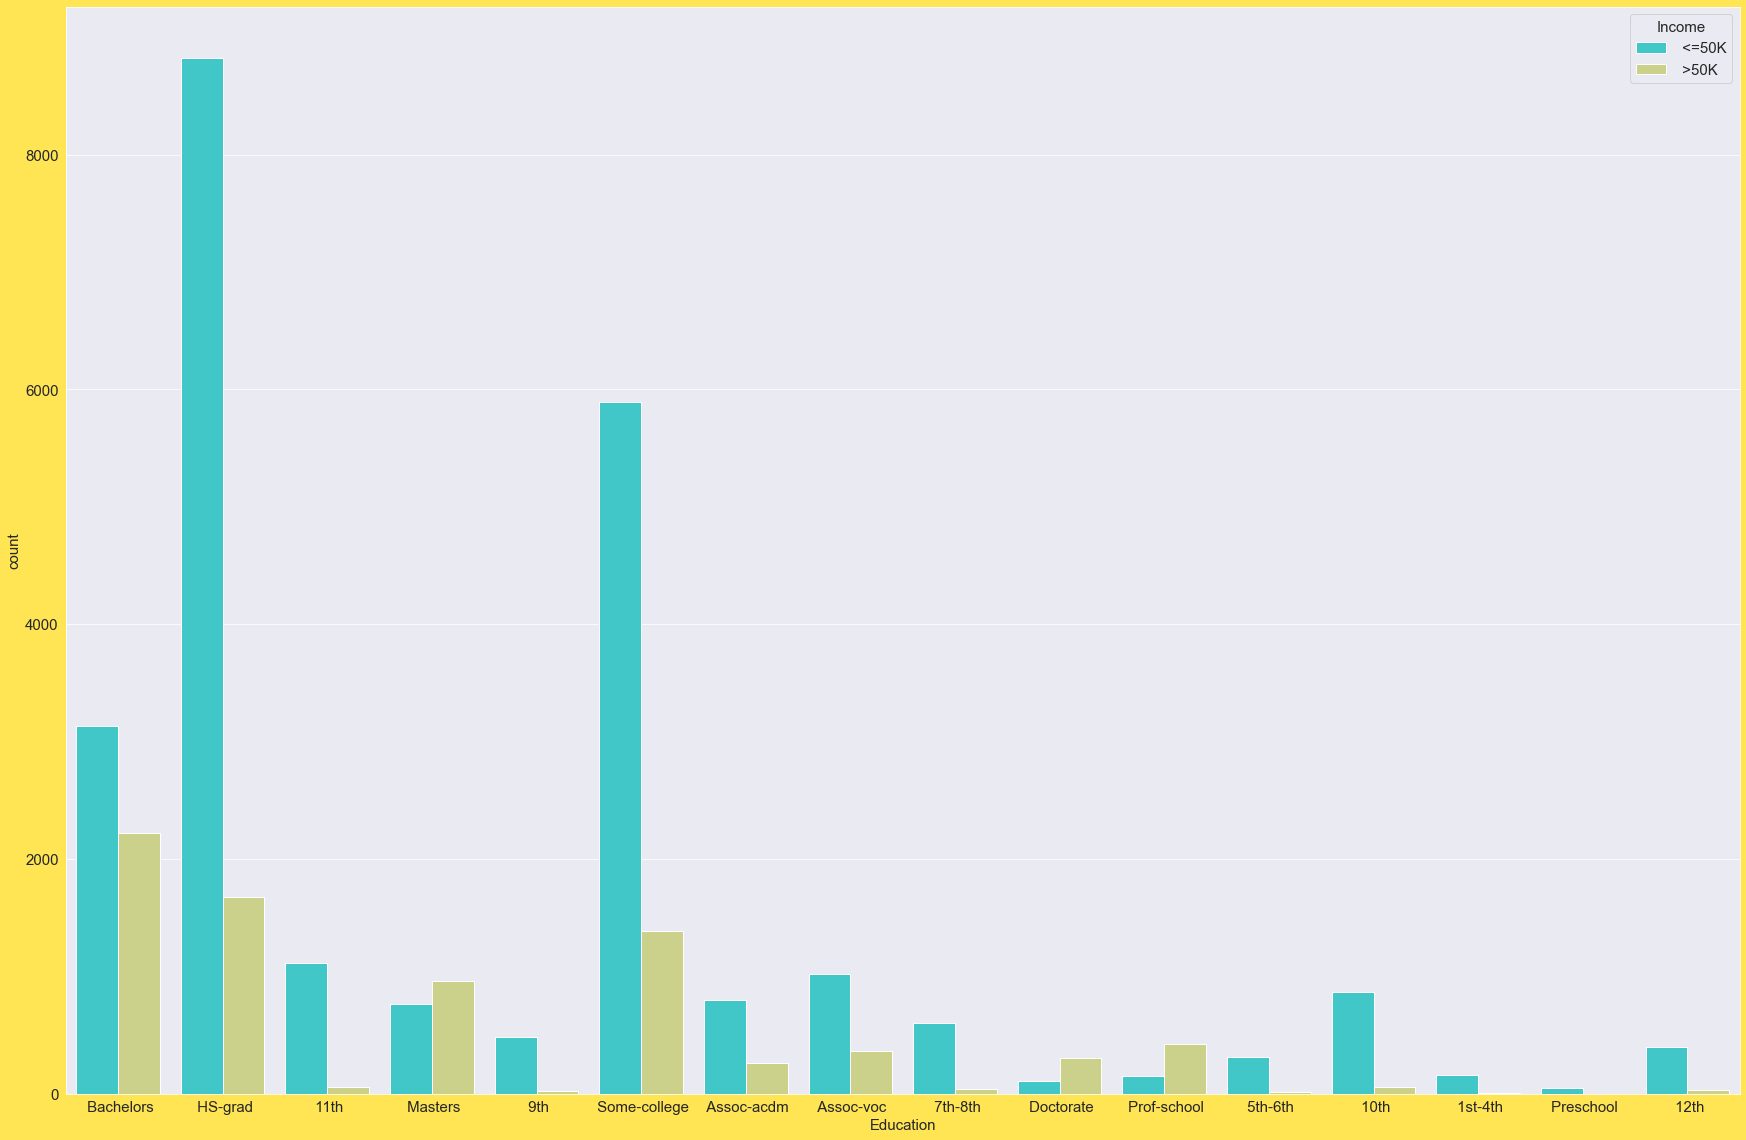

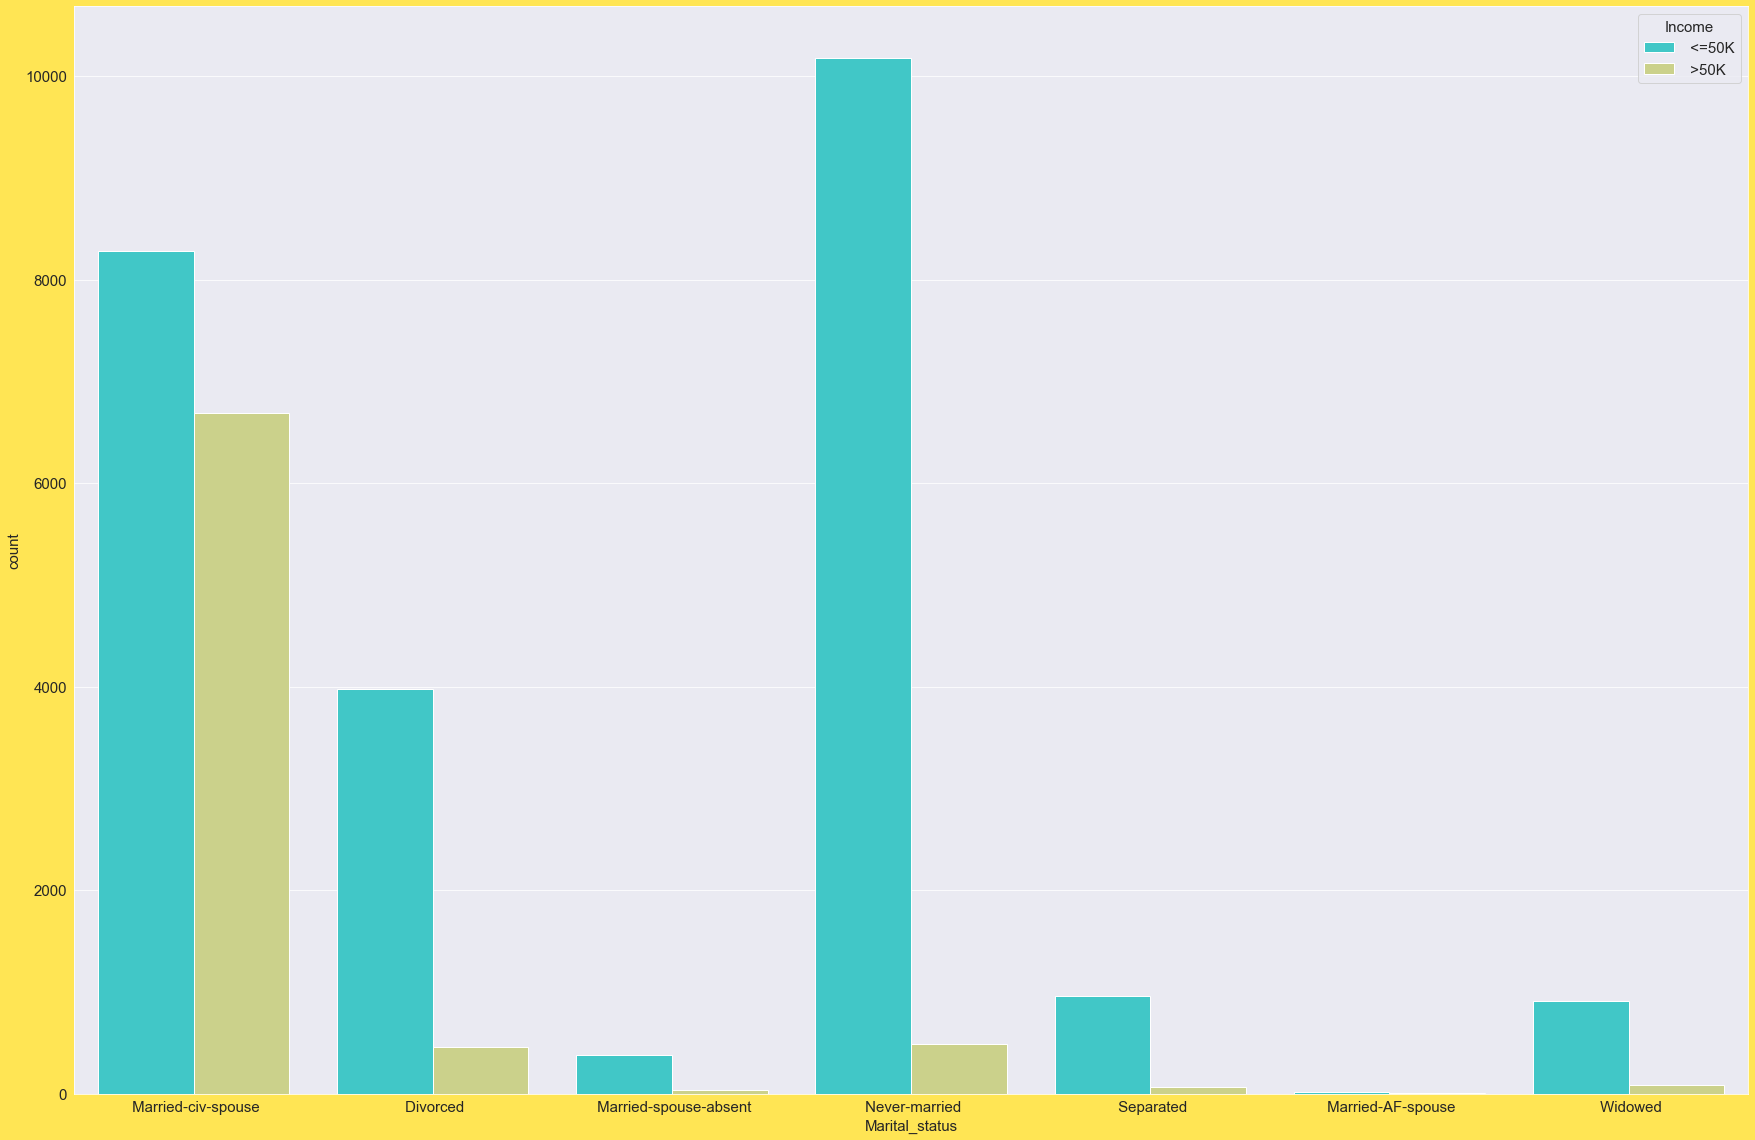

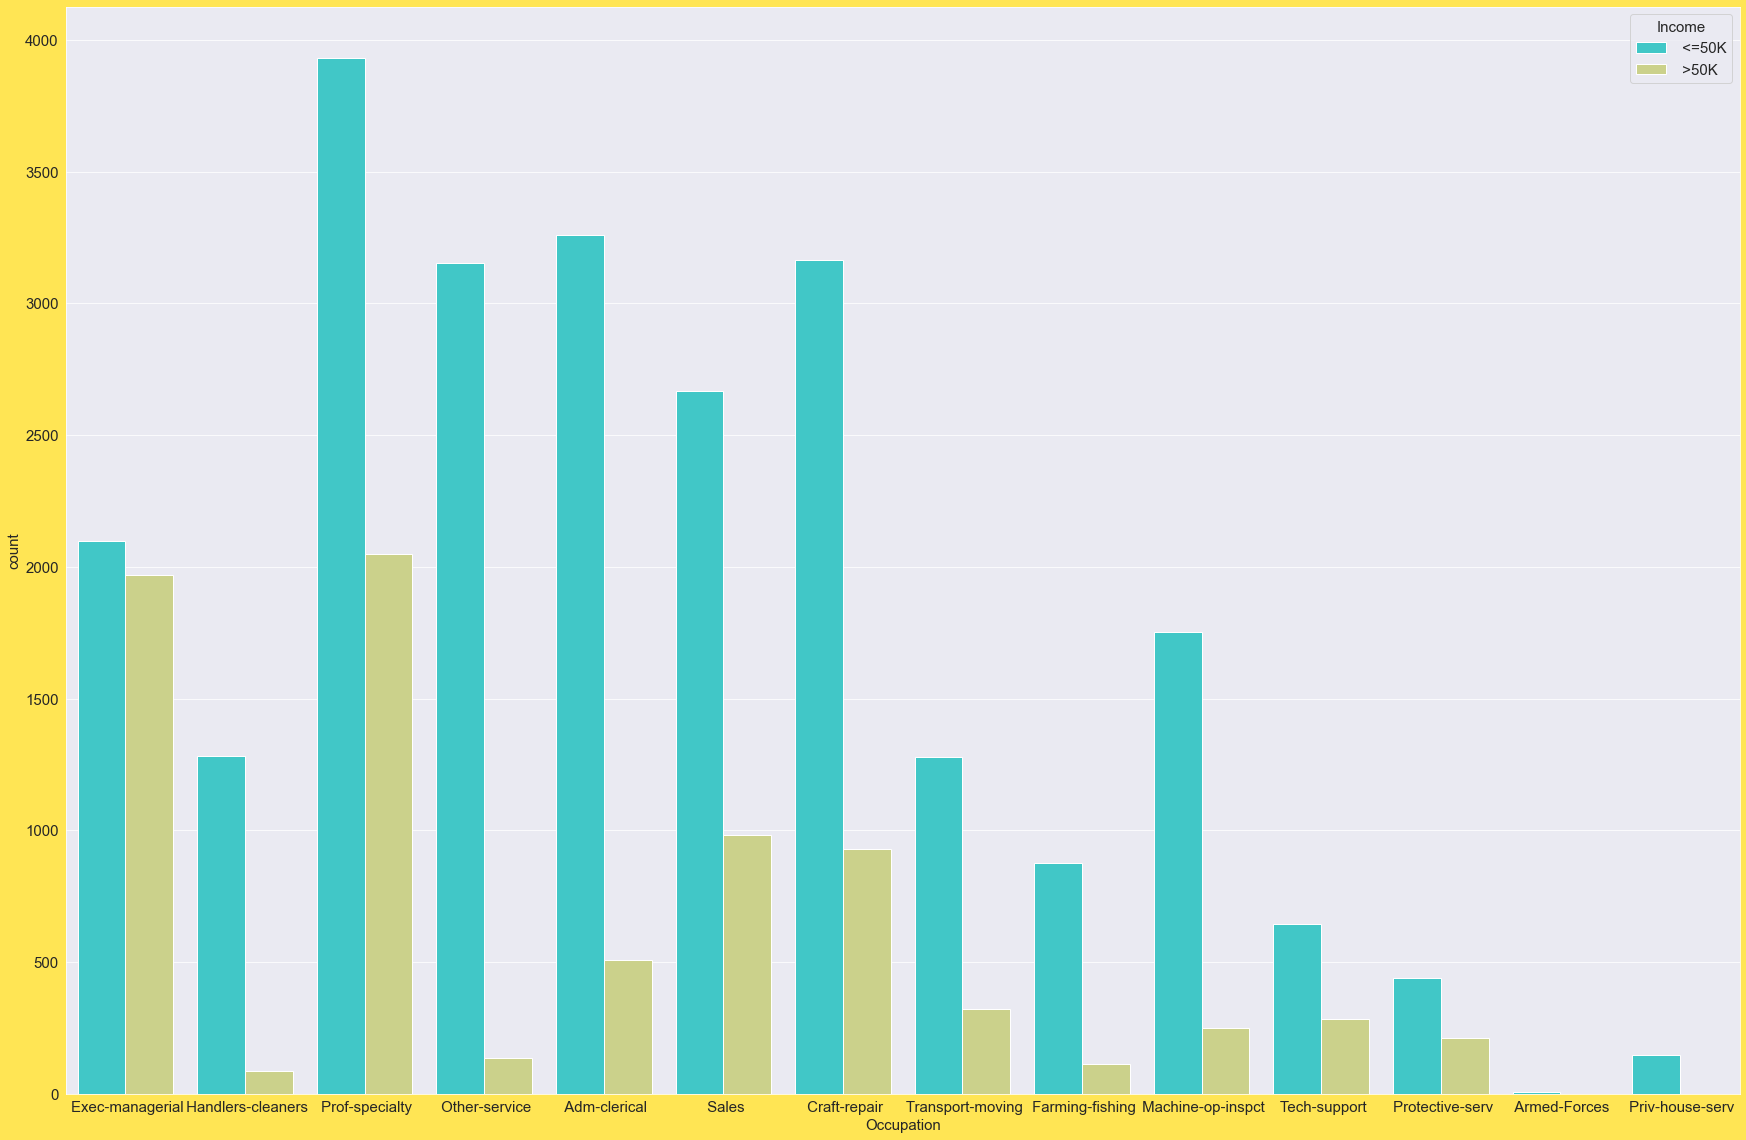

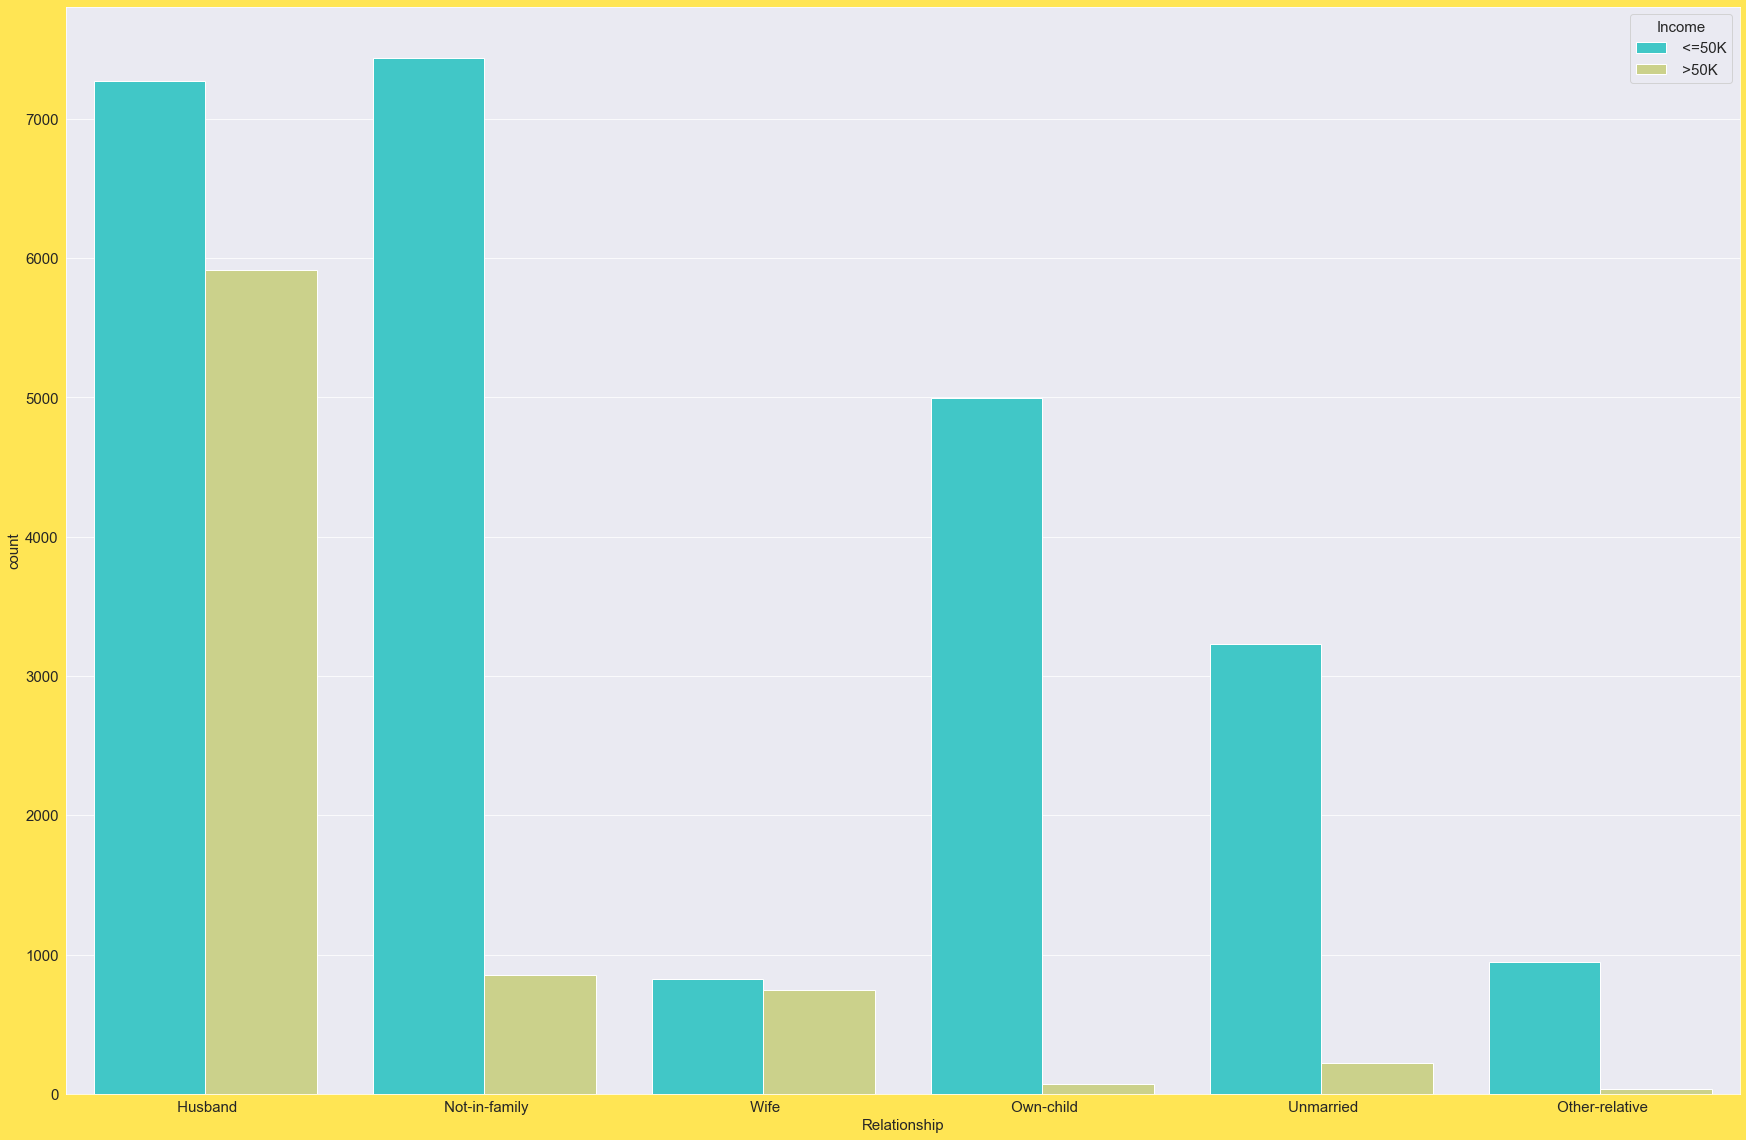

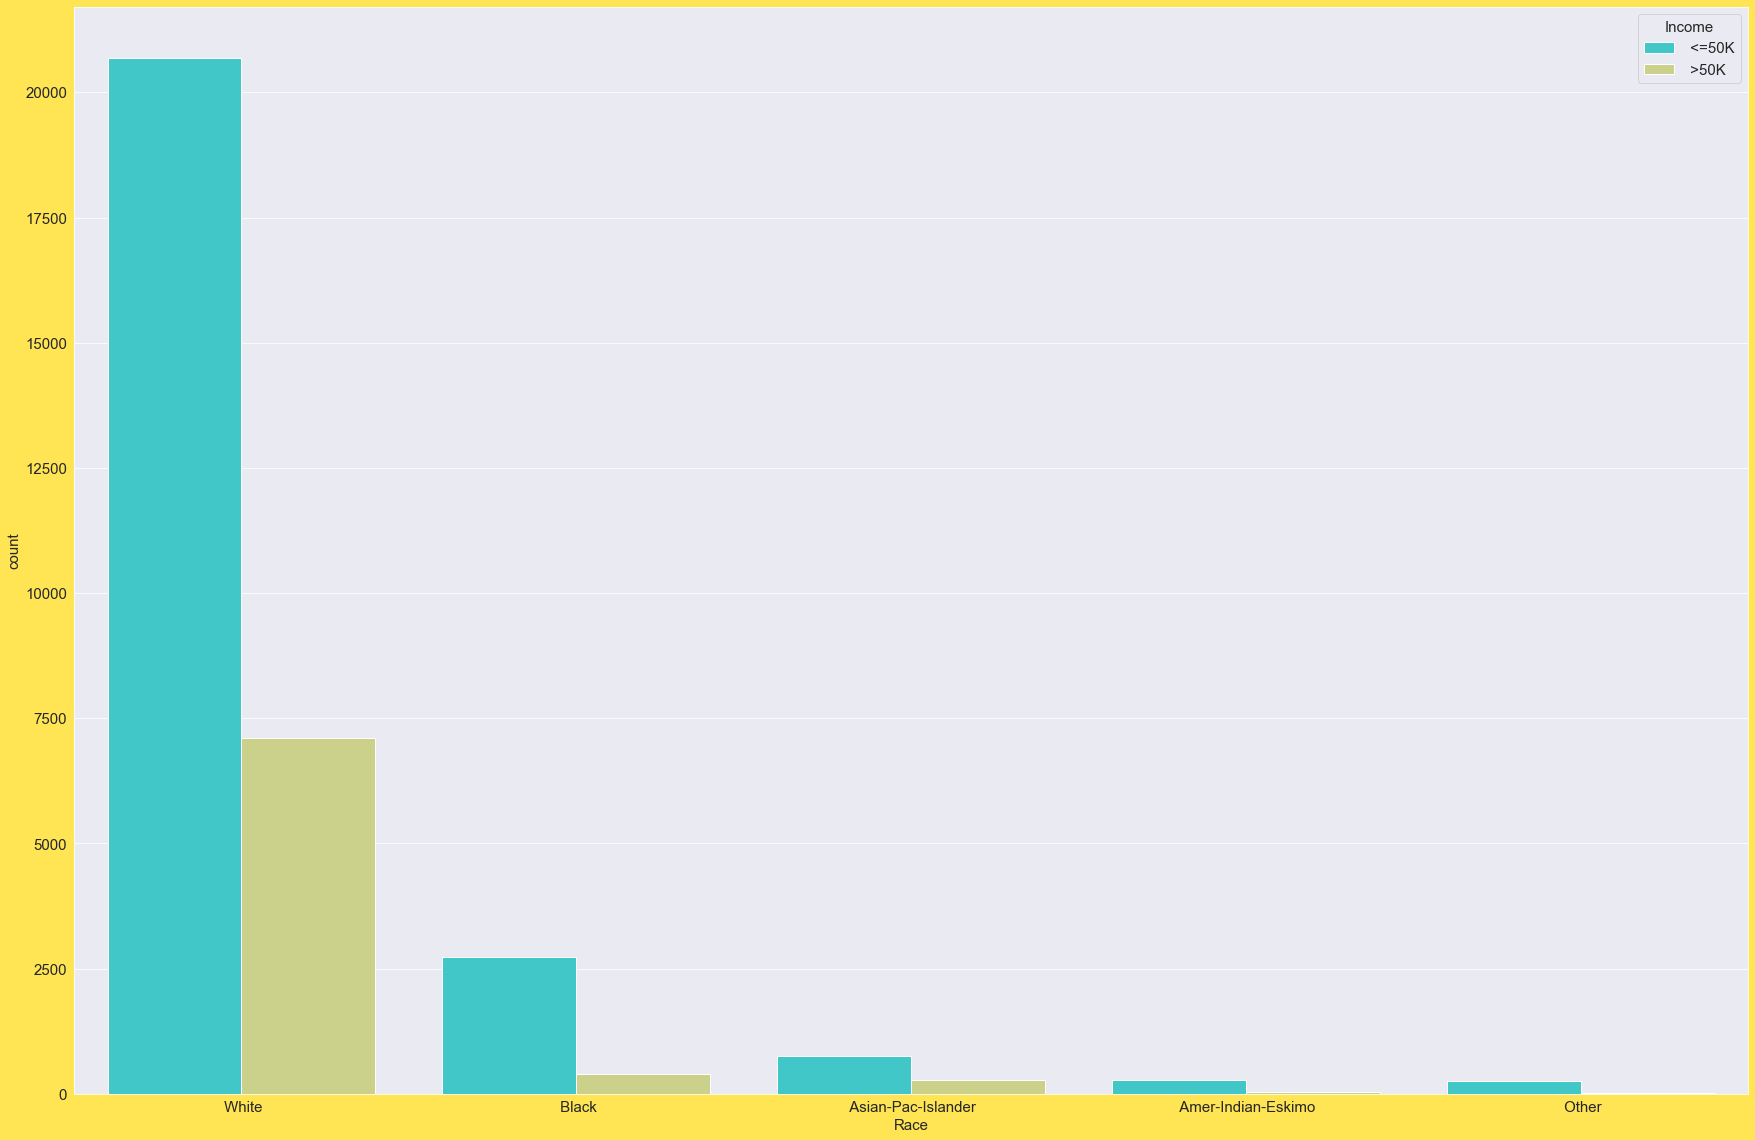

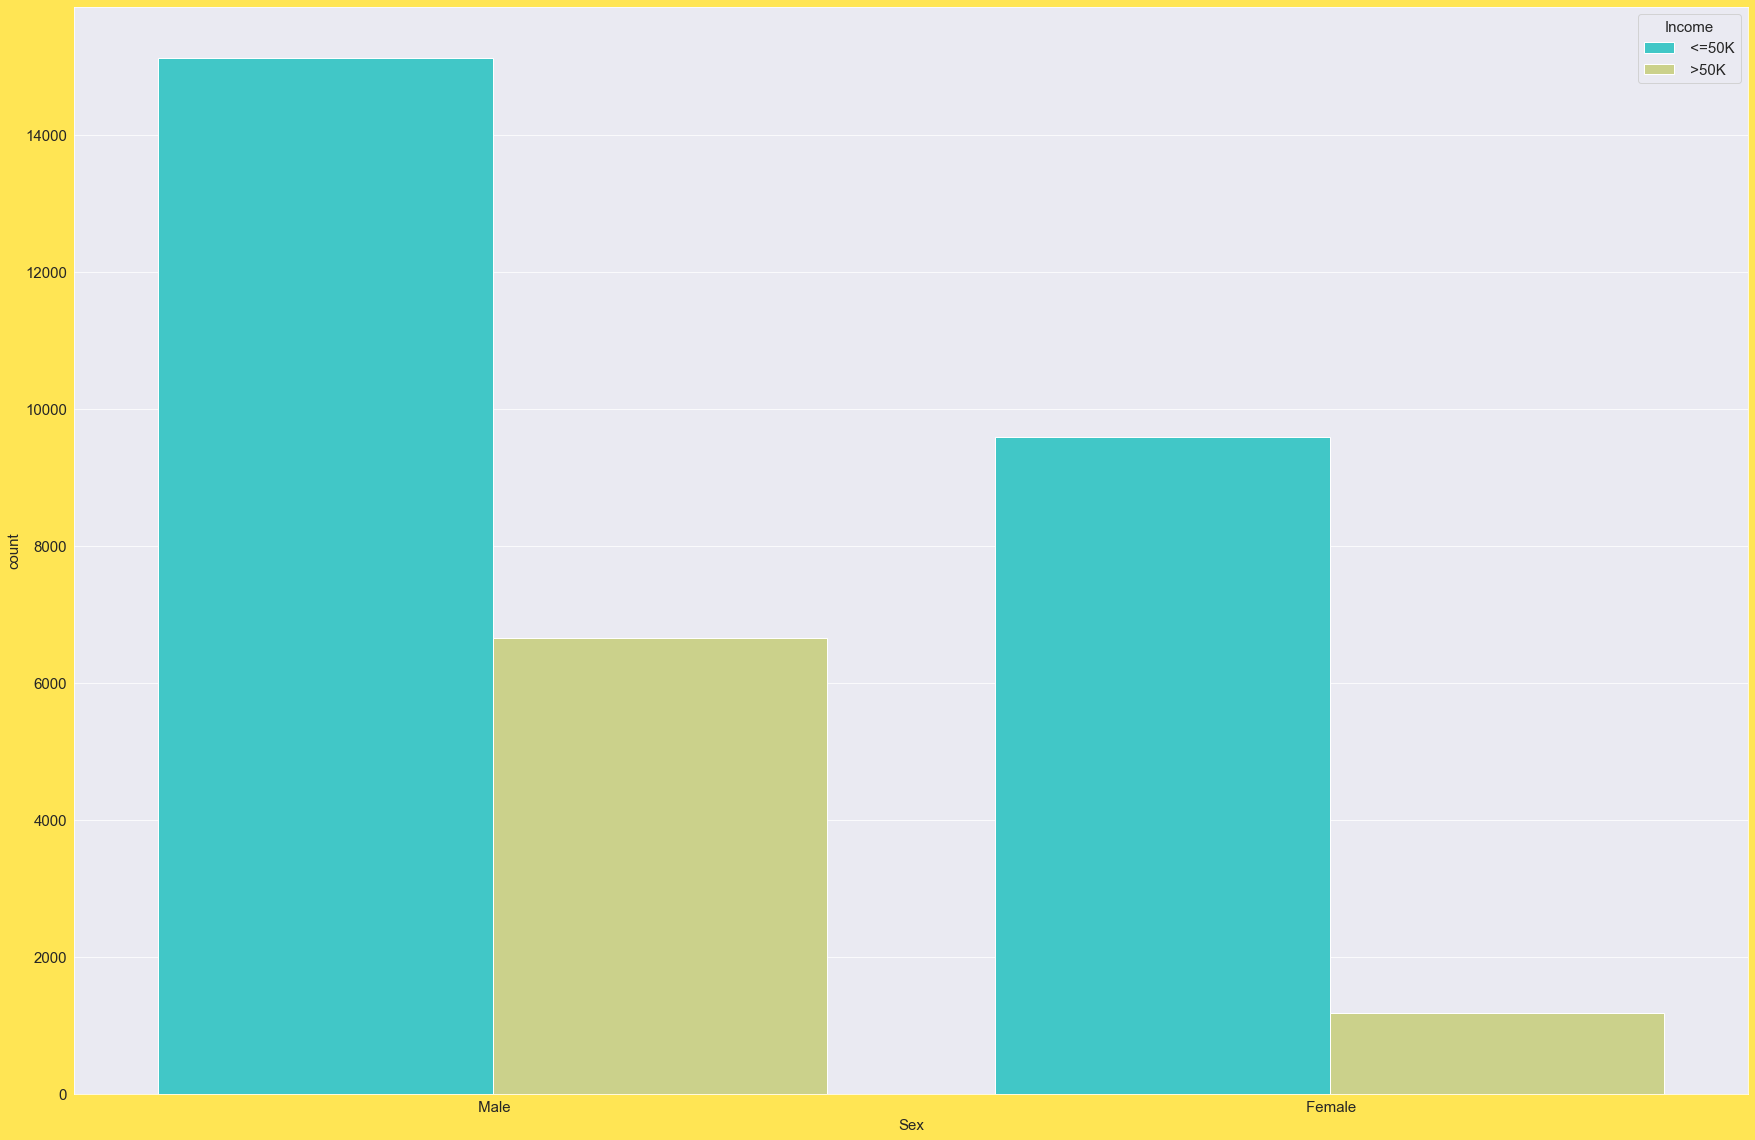

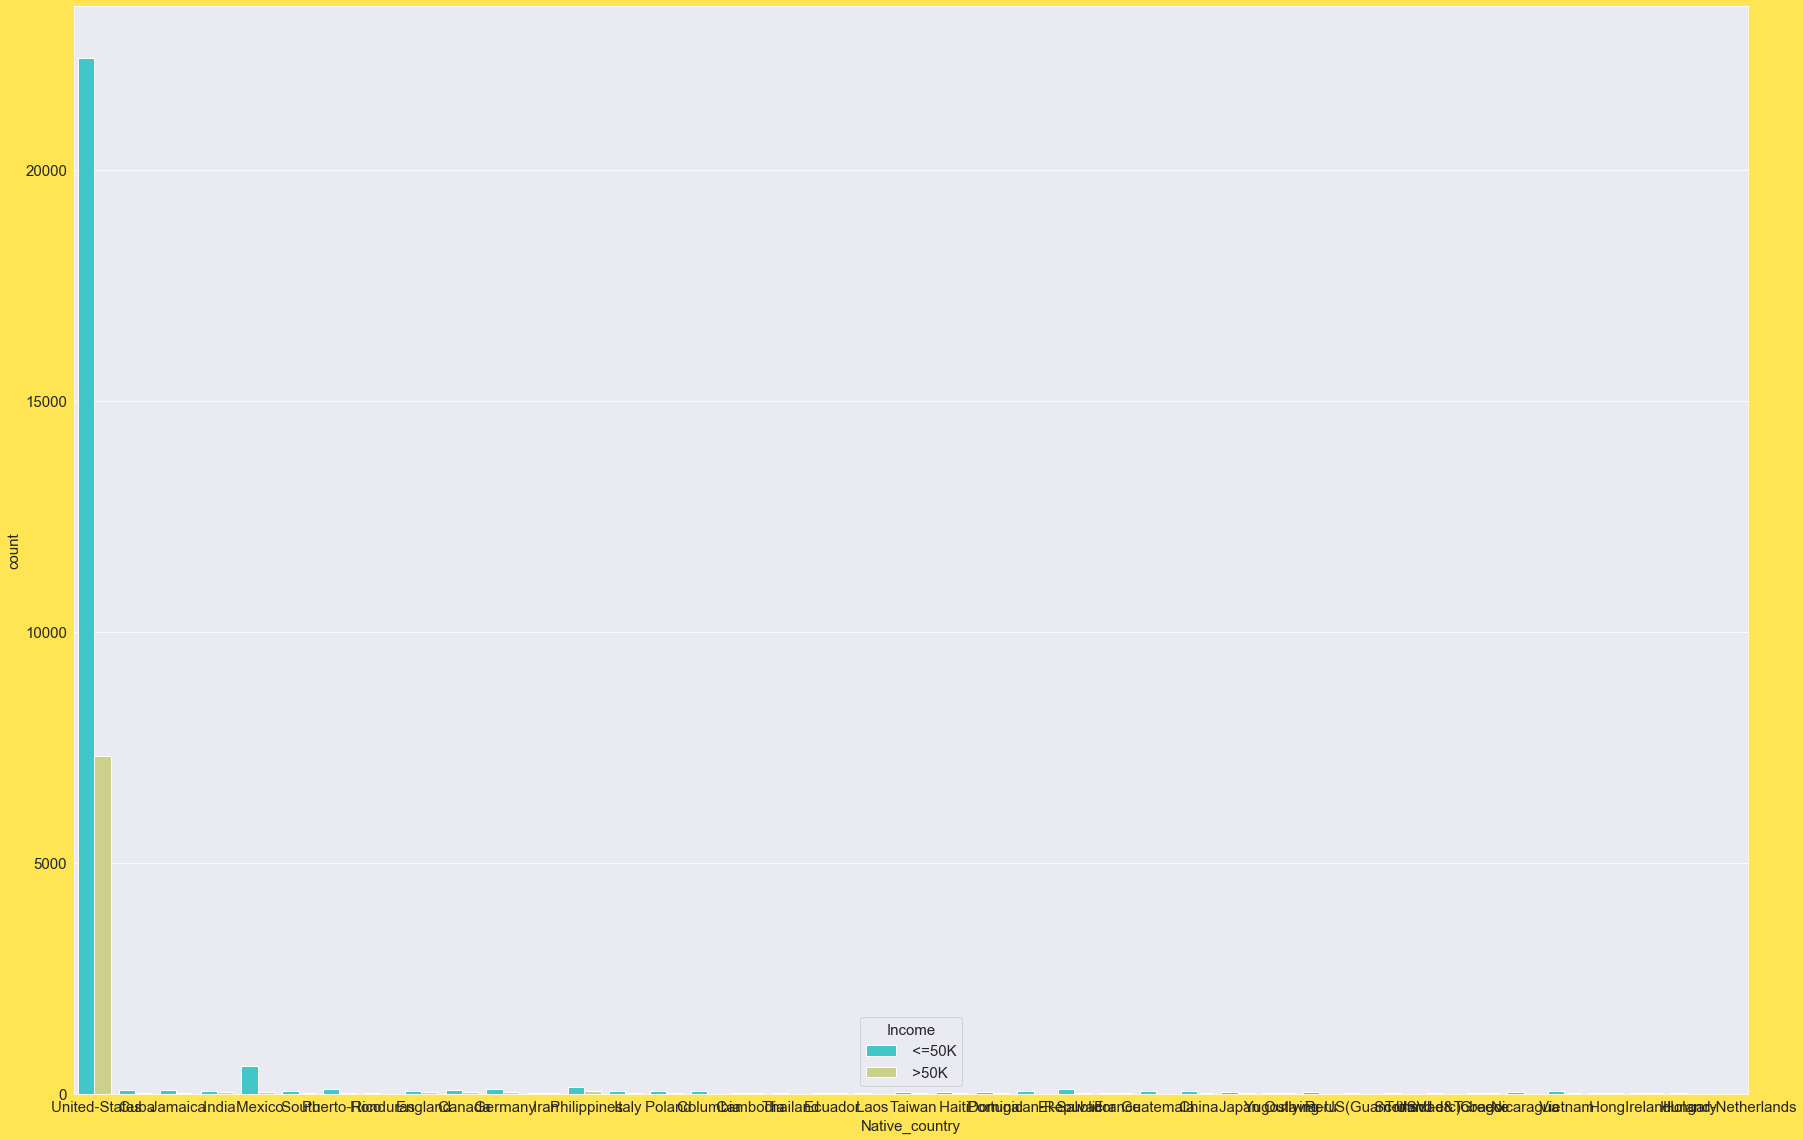

In [48]:
# plotting count plot to know the relationship of the cat features with its target loan_status
for i in cat_cols:
    plt.figure(figsize=(30,20))
    sns.countplot(income[i],hue='Income',data=income,palette='rainbow')
    plt.show()

-> People working in private sector is making more than 50k when compared to other workclasses

-> Interestingly people who did their Bachelors are more likely to earn more than 50k

-> Married-civ-spouse are earning more than 50k

-> People who are working in Exec-managerial are earning more than 50k followed by Prof-speciality

-> White people are earning more as we know that majority of the data in native-country is from USA.

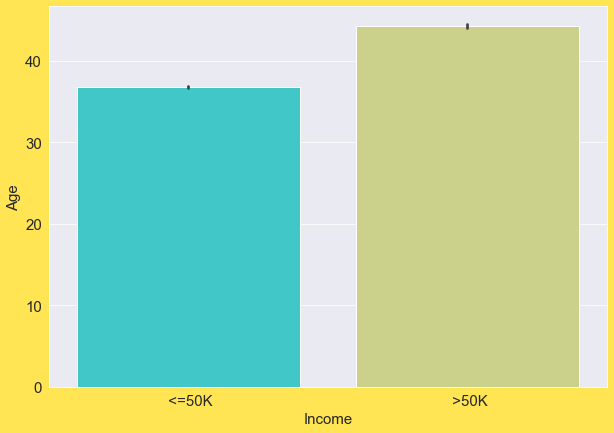

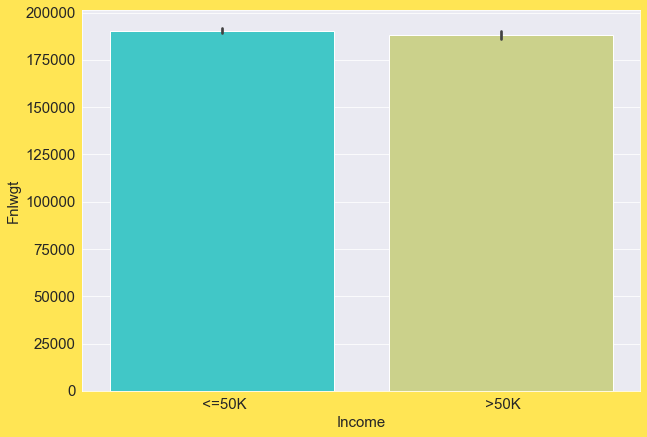

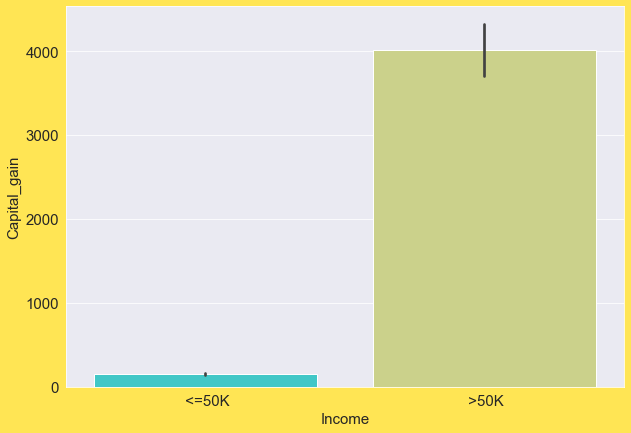

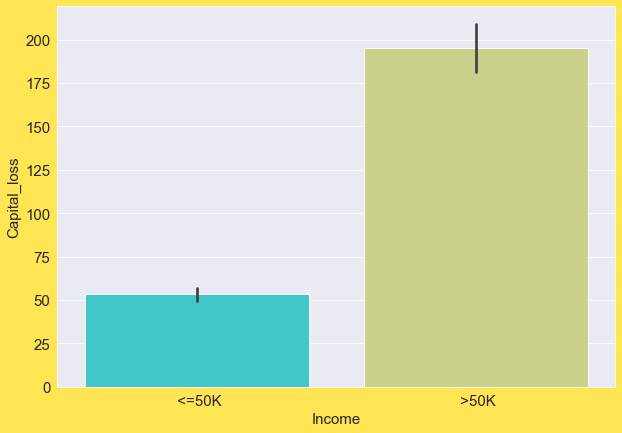

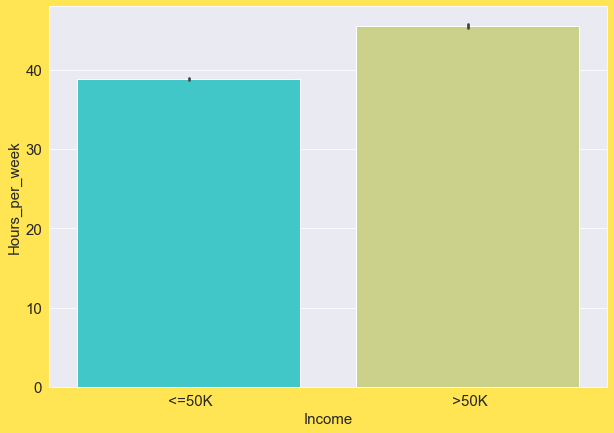

In [49]:
# plotting count plot to know the relationship of the cont features with its target loan_status
for i in cont_cols:
    sns.barplot(income['Income'],income[i],data=income,palette='rainbow')
    plt.show()

-> People with age greater than 40 are more who earn >50k

-> Majority of the peoples income is less than 50k beacuse their capital gain is 0-100 and loss is 0-55

-> People who are more than 40 hours per week are earning >50k

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' Self-emp-inc'),
  Text(6, 0, ' Without-pay'),
  Text(7, 0, ' Never-worked')])

<Figure size 1440x720 with 0 Axes>

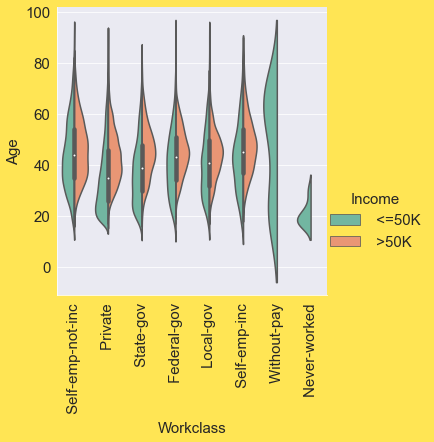

In [50]:
# Let's plot catplot for Workclass and Age
plt.figure(figsize=(20,10))
sns.catplot(x = "Workclass", y = "Age", hue = "Income", kind = "violin", data=income, split=True,palette='Set2')
plt.xticks(rotation=90)

All the Workclass has chances of getting income >50k except Without-pay and Never-worked.Which means if a person is working then there is a chance that he gets income of >50k.But if he is not at all working then obviously he'll not get that income.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

<Figure size 1440x720 with 0 Axes>

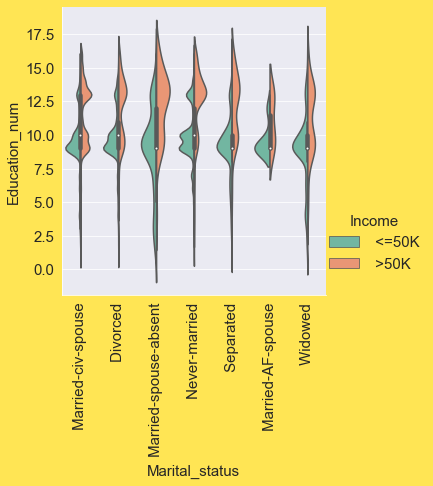

In [51]:
# Let's plot catplot for Marital_status and Education_num
plt.figure(figsize=(20,10))
sns.catplot(x = "Marital_status", y = "Education_num", hue = "Income", kind = "violin", data=income, split=True,palette='Set2')
plt.xticks(rotation=90)


If the education number is high then obviously Income is high, but for married-spouse-absent is showing high education_num.

(array([0, 1]), [Text(0, 0, ' Male'), Text(1, 0, ' Female')])

<Figure size 1440x720 with 0 Axes>

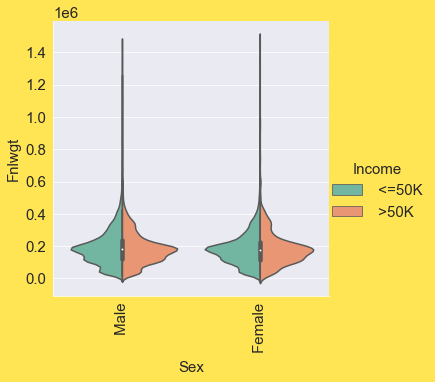

In [52]:
# Let's plot catplot for Sex and Fnlwgt
plt.figure(figsize=(20,10))
sns.catplot(x = "Sex", y = "Fnlwgt", hue = "Income", kind = "violin", data=income, split=True,palette='Set2')
plt.xticks(rotation=90)

Both for male and female the Fnlwgt is same and they have same income also.

<Figure size 1440x720 with 0 Axes>

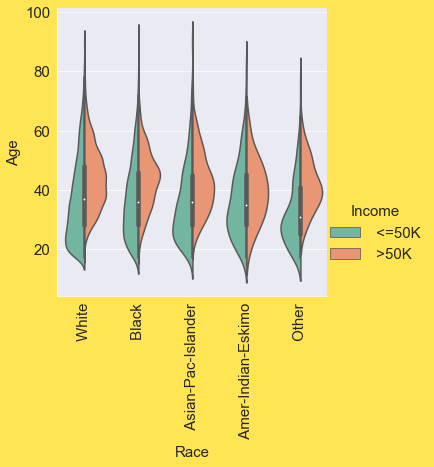

In [53]:
# Let's plot catplot for Race and Age
plt.figure(figsize=(20,10))
sns.catplot(x = "Race", y = "Age", hue = "Income", kind = "violin", data=income, split=True,palette='Set2')
plt.xticks(rotation=90);

Chances of getting income >50k is more in case of Whites.That means in US white peoples are dominating.

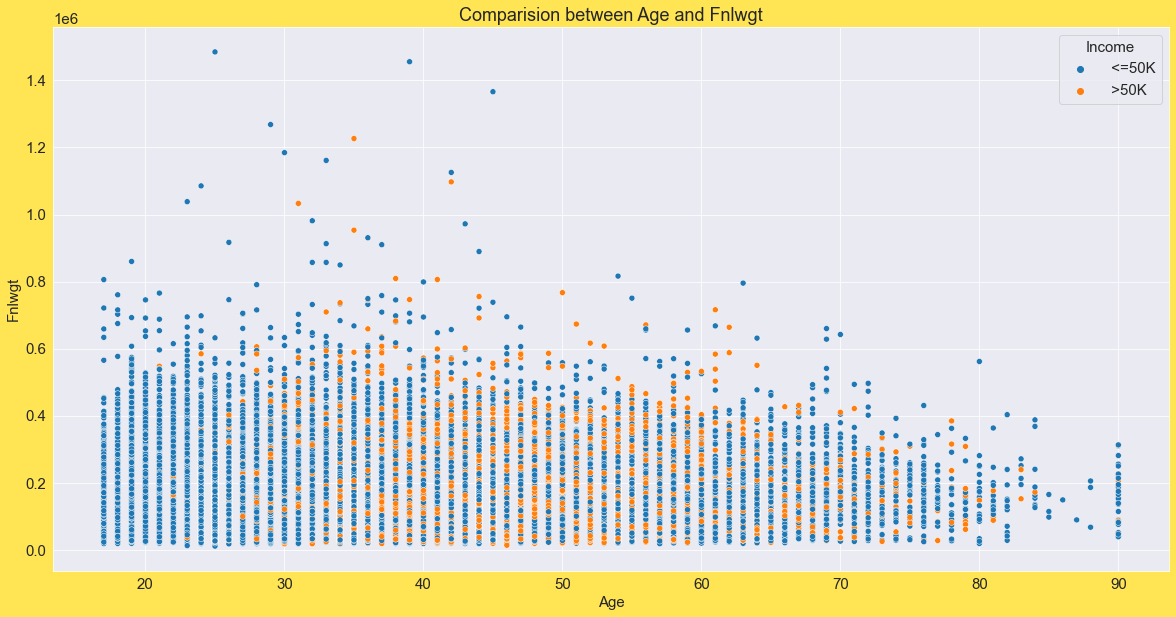

In [54]:
#Comparision between features using scatter plot
plt.figure(figsize=(20,10))
plt.title('Comparision between Age and Fnlwgt')
sns.scatterplot(income['Age'],income['Fnlwgt'],hue=income["Income"]);

As the age of the worker increses there is less chance to get more income,And also as the Fnlgwt increases then the chance to get income is decreaseing.

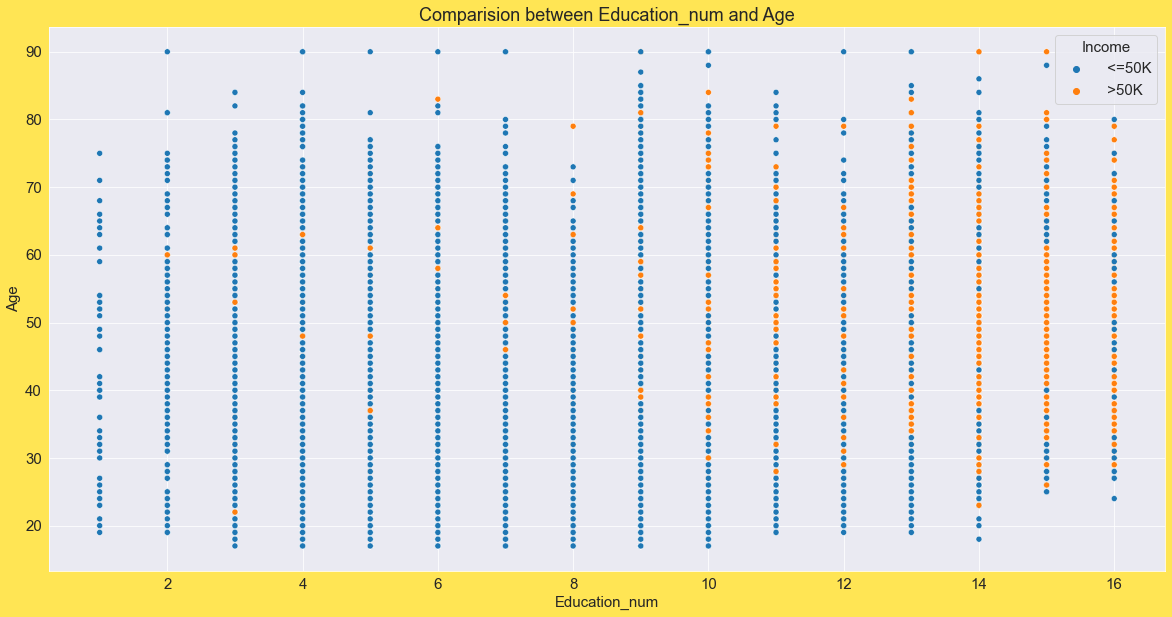

In [55]:
#Comparision between features using scatter plot
plt.figure(figsize=(20,10))
plt.title('Comparision between Education_num and Age')
sns.scatterplot(income['Education_num'],income['Age'],hue=income["Income"]);

People with age above 70 has less chance of getting work and As the education number increases then the chance of getting income>50k is also high.

<AxesSubplot:title={'center':'Comparision between Age and Education_num'}, xlabel='Age', ylabel='Education_num'>

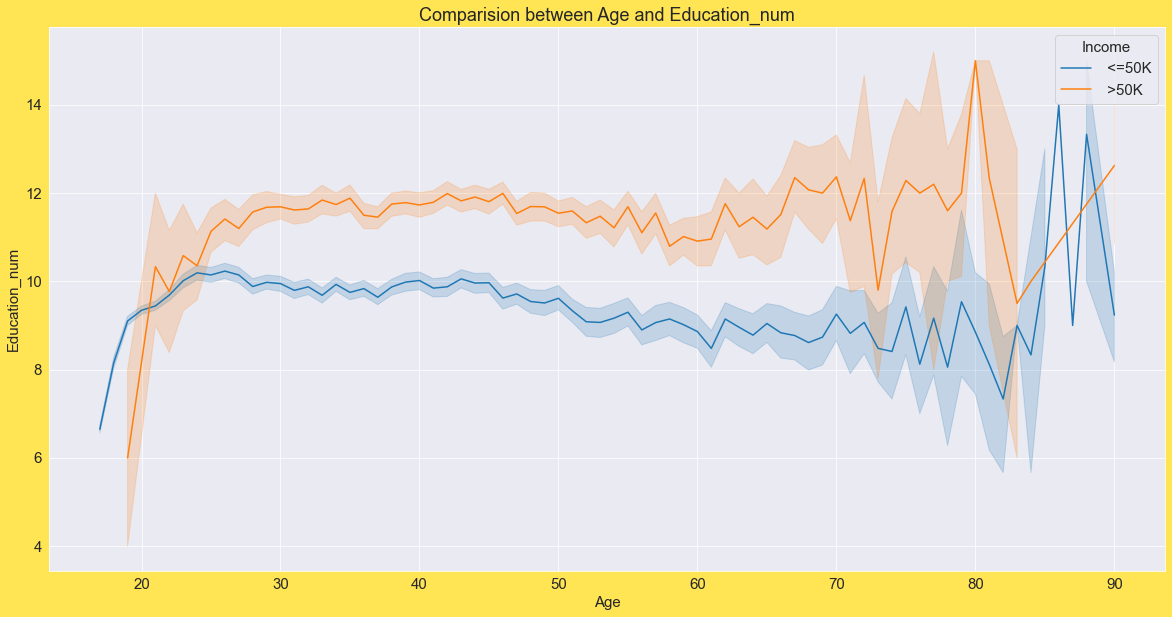

In [56]:
#Comparision between features using line plot
plt.figure(figsize=(20,10))
plt.title('Comparision between Age and Education_num')
sns.lineplot(income['Age'],income['Education_num'],hue=income["Income"])

We can see that the education number is increasing chance of getting income >50k is also increasing.And also as age is more means experience is more the chance of getting income more than 50k is also more.

# Encoding the target income

In [57]:
income['Income'].value_counts()

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
income['Income'] = le.fit_transform(income['Income'])

In [59]:
income['Income'].value_counts()

0    24697
1     7839
Name: Income, dtype: int64

In [60]:
# # Calaculating the % rate where  for each categorical variable

for i in cat_cols:
    print(income.groupby(i)['Income'].mean()*100)
    print('\n')
    

Workclass
 Federal-gov         38.645833
 Local-gov           29.479216
 Never-worked         0.000000
 Private             21.020849
 Self-emp-inc        55.734767
 Self-emp-not-inc    28.503937
 State-gov           27.216654
 Without-pay          0.000000
Name: Income, dtype: float64


Education
 10th             6.645230
 11th             5.106383
 12th             7.621247
 1st-4th          3.614458
 5th-6th          4.819277
 7th-8th          6.201550
 9th              5.252918
 Assoc-acdm      24.835989
 Assoc-voc       26.121563
 Bachelors       41.498505
 Doctorate       74.092010
 HS-grad         15.951973
 Masters         55.691057
 Preschool        0.000000
 Prof-school     73.437500
 Some-college    19.033233
Name: Income, dtype: float64


Marital_status
 Divorced                 10.425580
 Married-AF-spouse        43.478261
 Married-civ-spouse       44.689379
 Married-spouse-absent     8.133971
 Never-married             4.603413
 Separated                 6.439024
 Widowe

In [61]:
# looking at the pivot table between Education and Sex comparing the income
income.pivot_table('Income',index='Sex',columns='Education')*100

# Interestingly we can see that women who did doctorate has more chance to earn more than 50k
# And men who did their graduation or Prof-school are more likely to get higher than 50k

Education      10th      11th       12th   1st-4th   5th-6th   7th-8th  \
Sex                                                                      
 Female    1.016949  1.851852   2.777778  0.000000  2.380952  0.625000   
 Male      9.247649  6.998654  10.034602  4.918033  5.645161  8.041237   

Education       9th   Assoc-acdm   Assoc-voc   Bachelors   Doctorate  \
Sex                                                                    
 Female    3.472222    13.301663   13.400000   20.951792   58.139535   
 Male      5.945946    32.352941   33.333333   50.401714   78.287462   

Education    HS-grad    Masters   Preschool   Prof-school   Some-college  
Sex                                                                       
 Female     6.670602  33.395522         0.0     45.652174       7.030692  
 Male      20.377146  65.767285         0.0     78.719008      26.540179

<AxesSubplot:xlabel='Sex'>

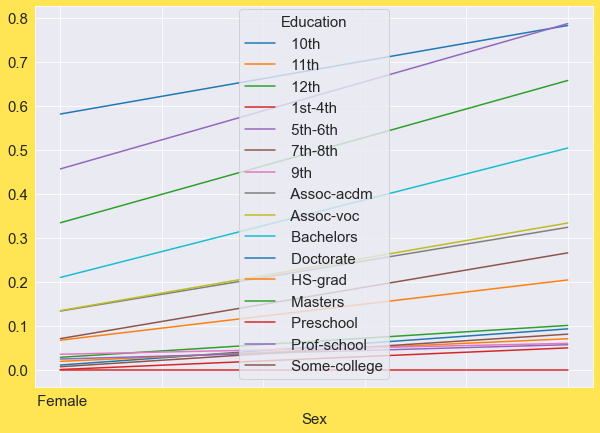

In [62]:
# ploting the pivot
income.pivot_table('Income',index='Sex',columns='Education').plot()

# We can observe the same thing in the graphs

In [63]:
# pivot table with Workclass and Marital_status
income.pivot_table('Income',index='Marital_status',columns='Workclass',dropna=True)*100

Workclass                Federal-gov   Local-gov   Never-worked    Private  \
Marital_status                                                               
 Divorced                  16.666667   10.840108            0.0   9.118449   
 Married-AF-spouse         66.666667         NaN            NaN  41.176471   
 Married-civ-spouse        64.543524   51.026393            0.0  42.352601   
 Married-spouse-absent     18.181818    4.545455            NaN   6.344411   
 Never-married             10.204082    7.735849            0.0   3.771262   
 Separated                 19.230769    7.936508            NaN   5.731707   
 Widowed                   13.888889    9.302326            NaN   6.747638   

Workclass                Self-emp-inc   Self-emp-not-inc   State-gov  \
Marital_status                                                         
 Divorced                   24.000000          15.753425   11.428571   
 Married-AF-spouse                NaN          50.000000    0.000000   
 Married-civ-spouse         67.622461          36.092912   51.530612   
 Married-spouse-absent       0.000000          25.806452   11.764706   
 Never-married              12.800000          12.469438    5.097087   
 Separated                  25.000000           3.773585    4.651163   
 Widowed                    37.931034          13.513514    3.846154   

Workclass                Without-pay  
Marital_status                        
 Divorced                        NaN  
 Married-AF-spouse               NaN  
 Married-civ-spouse              0.0  
 Married-spouse-absent           0.0  
 Never-married                   0.0  
 Separated                       NaN  
 Widowed                         0.0

<AxesSubplot:xlabel='Marital_status'>

<Figure size 2160x1440 with 0 Axes>

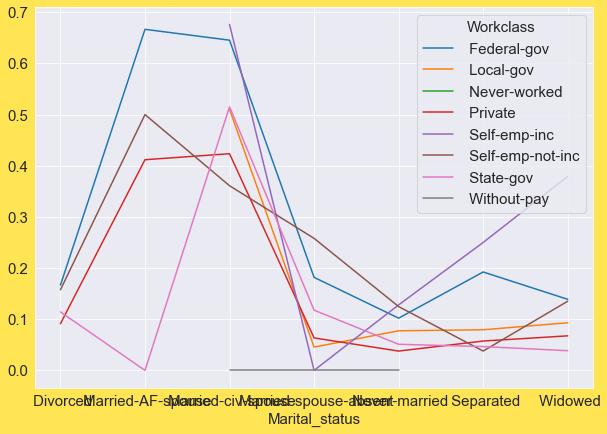

In [64]:
plt.figure(figsize=(30,20))
income.pivot_table('Income',index='Marital_status',columns='Workclass',dropna=True).plot()

Multivaritae Analysis

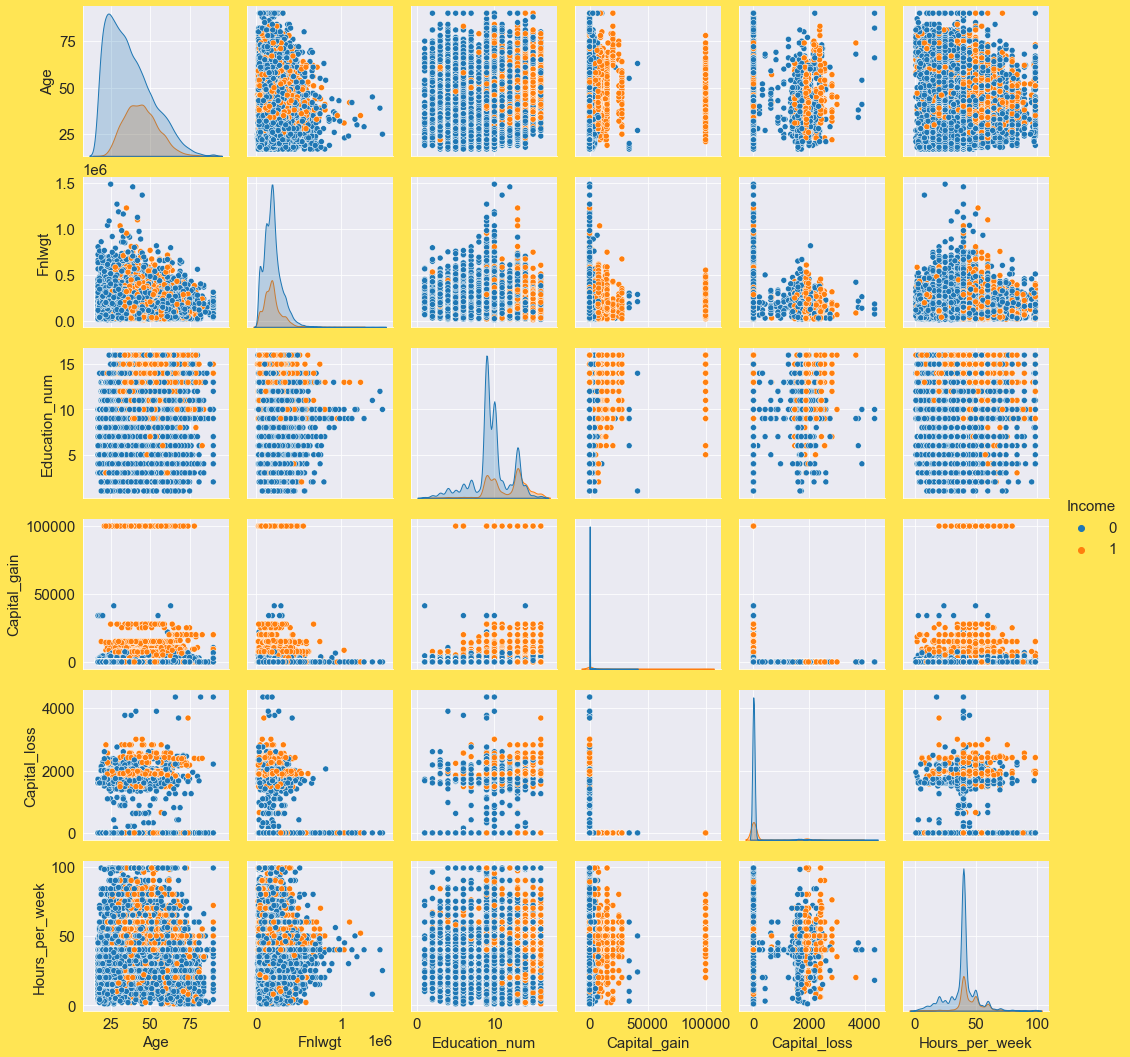

In [65]:
#pair ploting for df
sns.pairplot(income,hue="Income")

# We can observe that the data is higly skewed and there can be outliers present in some of the columns
# The correlation with the target is also high in some columns
# We should check for multicollinearity as well before model building

## Feature Engineering and Selection

In [66]:
income.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States       0  
1             0             0              40   United-States       0  
2             0             0              40   United-States       0  
3             0             0              40            Cuba       0  
4             0             0              40   United-States       0

In [67]:
income.shape

(32536, 15)

In [68]:
# As we have already said we don't need the Education column as edu_num is the exact same thing as education
# so dropping education from df and cat_cols as well
income.drop(['Education'],axis=1,inplace=True)
cat_cols.remove('Education')

In [69]:
income.shape

# We can see that we have one less column

(32536, 14)

In [70]:
income['Relationship'].value_counts()

 Husband           13187
 Not-in-family      8291
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [71]:
income['Marital_status'].value_counts()

# We can re categorize these into married,unmarried,divorced and widowed 

# This reduces the complexity in the categories and easy to learn by the model

 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [72]:
# we have capital gain and loss column
# lets create a new column with name Capital income with the difference of capital gain and capital loss
income['Capital_profit'] = income['Capital_gain'] - income['Capital_loss']

# making it a one single column
# Although most of them are zeroes we can use it 

In [73]:
income.head()

Age          Workclass  Fnlwgt  Education_num       Marital_status  \
0   50   Self-emp-not-inc   83311             13   Married-civ-spouse   
1   38            Private  215646              9             Divorced   
2   53            Private  234721              7   Married-civ-spouse   
3   28            Private  338409             13   Married-civ-spouse   
4   37            Private  284582             14   Married-civ-spouse   

           Occupation    Relationship    Race      Sex  Capital_gain  \
0     Exec-managerial         Husband   White     Male             0   
1   Handlers-cleaners   Not-in-family   White     Male             0   
2   Handlers-cleaners         Husband   Black     Male             0   
3      Prof-specialty            Wife   Black   Female             0   
4     Exec-managerial            Wife   White   Female             0   

   Capital_loss  Hours_per_week  Native_country  Income  Capital_profit  
0             0              13   United-States       0               0  
1             0              40   United-States       0               0  
2             0              40   United-States       0               0  
3             0              40            Cuba       0               0  
4             0              40   United-States       0               0

In [74]:
# dropping gain and loss columns
income.drop(['Capital_gain','Capital_loss'],axis=1,inplace=True)

In [75]:
cont_cols

['Age', 'Fnlwgt', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

In [76]:
cont_cols.append('Capital_profit')

In [77]:
# also dropping from cont_cols
cont_cols.remove('Capital_gain')
cont_cols.remove('Capital_loss')

In [78]:
income.shape
# We can see we have dropped two columns

(32536, 13)

# Checking and removing the outliers

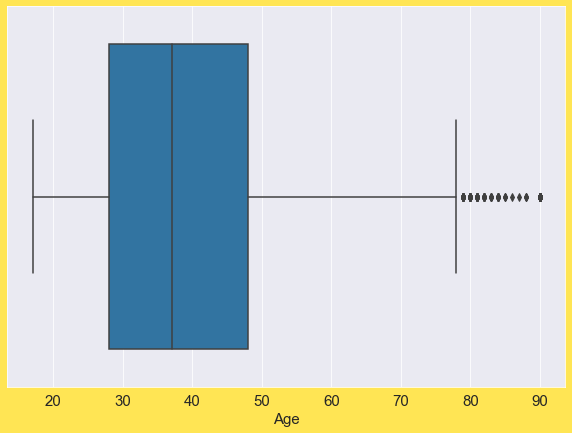

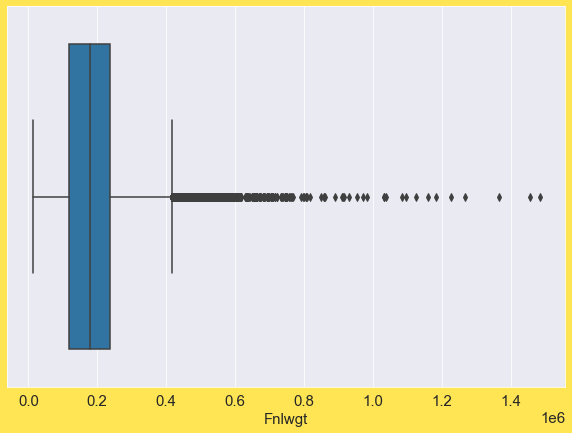

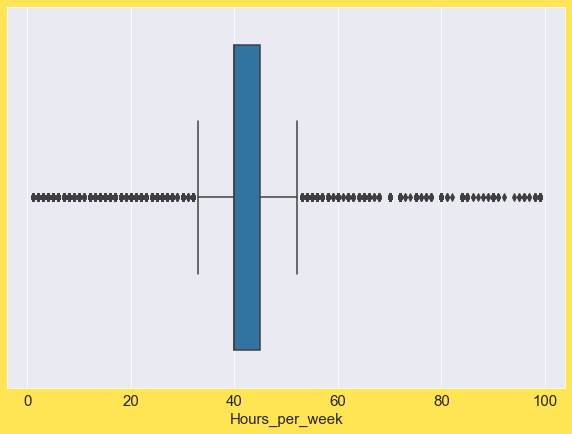

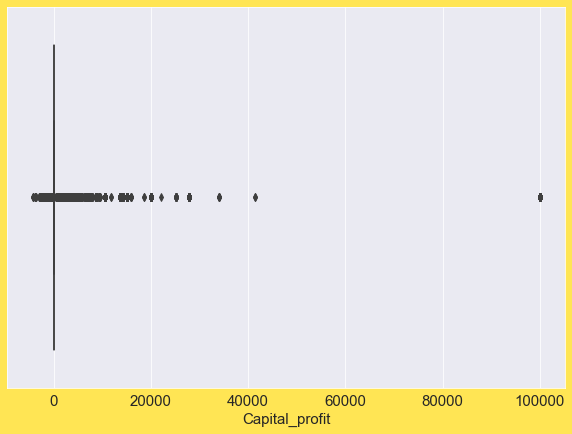

In [79]:
#Checking for outliers using boxplot
for i in cont_cols:
    sns.boxplot(income[i])
    plt.show()

# We can see there are outliers in these continuoius columns

In [80]:
# Removing the outliers using zscore method
# using zscore method
from scipy.stats import zscore

out_cols = income[['Age', 'Fnlwgt', 'Capital_profit', 'Hours_per_week']]

z=np.abs(zscore(out_cols))

print(np.where(z>3))

(array([    9,    27,    36, ..., 32500, 32500, 32506], dtype=int64), array([3, 3, 1, ..., 0, 3, 3], dtype=int64))


In [81]:
income_df = income[(z<3).all(axis=1)]

In [82]:
# checking the % of dataloss after removing the outliers

print("shape before and after")
print("shape before: ",income.shape)
print("shape after: ",income_df.shape)
print("Percentage Loss: ",(income.shape[0]-income_df.shape[0])/income.shape[0]*100)

# The data loss is around 3% we can go ahead and remove the outliers

shape before and after
shape before:  (32536, 13)
shape after:  (31439, 13)
Percentage Loss:  3.371649864765183


In [83]:
# CHECKING WITH THE iqr method as well
Q1=out_cols.quantile(0.25)
Q3=out_cols.quantile(0.75)
IQR=Q3 - Q1

income_new_quant = income[~((income < (Q1 - 1.5 * IQR)) |(income > (Q3 + 1.5 * IQR))).any(axis=1)]

In [84]:
# checking the % of dataloss after removing the outliers

print("shape before and after")
print("shape before: ",income.shape)
print("shape after: ",income_df.shape)
print("Percentage Loss: ",(income.shape[0]-income_df.shape[0])/income.shape[0]*100)

# The data loss is around 3% we can go ahead and remove the outliers

shape before and after
shape before:  (32536, 13)
shape after:  (31439, 13)
Percentage Loss:  3.371649864765183


In [85]:
income_df.sample(20)

Age     Workclass  Fnlwgt  Education_num       Marital_status  \
13659   46       Private  326857             14   Married-civ-spouse   
8448    66       Private  101607              9             Divorced   
25952   46       Private   31432              9   Married-civ-spouse   
668     24       Private  172146              5        Never-married   
28615   46       Private  181363             12   Married-civ-spouse   
9169    21       Private  143995             10        Never-married   
4229    26       Private  182178             10   Married-civ-spouse   
2911    40       Private   96055              9            Separated   
23084   27       Private  133425              9        Never-married   
30052   35       Private  162601              9             Divorced   
31598   28       Private  190350              5   Married-civ-spouse   
1542    59     Local-gov  165695             10   Married-civ-spouse   
25953   30       Private  112383              9   Married-civ-spouse   
10155   28       Private  362491              9        Never-married   
4025    20       Private   34706             10        Never-married   
25509   46       Private  294907              3   Married-civ-spouse   
23778   30       Private   94245             10   Married-civ-spouse   
17223   46   Federal-gov  219967             13   Married-civ-spouse   
22824   29       Private   29361              9        Never-married   
24705   37       Private   38948              9   Married-civ-spouse   

               Occupation    Relationship    Race      Sex  Hours_per_week  \
13659               Sales         Husband   White     Male              65   
8448    Machine-op-inspct   Not-in-family   White     Male              10   
25952        Adm-clerical            Wife   White   Female              52   
668     Machine-op-inspct   Not-in-family   White     Male              40   
28615     Exec-managerial         Husband   White     Male              40   
9169       Prof-specialty       Own-child   Black     Male              20   
4229         Craft-repair         Husband   White     Male              40   
2911         Adm-clerical       Unmarried   White   Female              45   
23084     Exec-managerial   Not-in-family   White   Female              50   
30052        Adm-clerical       Unmarried   White   Female              40   
31598     Protective-serv            Wife   Black   Female              40   
1542         Craft-repair         Husband   White     Male              40   
25953    Transport-moving         Husband   White     Male              45   
10155   Handlers-cleaners       Own-child   White     Male              40   
4025      Exec-managerial   Not-in-family   Black     Male              47   
25509   Machine-op-inspct         Husband   White     Male              40   
23778   Handlers-cleaners         Husband   White     Male              40   
17223     Exec-managerial         Husband   White     Male              40   
22824       Other-service   Not-in-family   White   Female              38   
24705    Transport-moving         Husband   White     Male              50   

       Native_country  Income  Capital_profit  
13659   United-States       1           -2415  
8448    United-States       0               0  
25952   United-States       1            3103  
668     United-States       0           -1721  
28615   United-States       1               0  
9169    United-States       0               0  
4229    United-States       0            2829  
2911    United-States       0               0  
23084   United-States       0               0  
30052   United-States       0               0  
31598   United-States       0               0  
1542    United-States       0               0  
25953   United-States       0               0  
10155   United-States       0               0  
4025    United-States       0               0  
25509          Mexico       0               0  
23778   United-States       0          

# CHECKING AND REMOVING SKEWNESS

In [86]:
income_df.skew().T

Age               0.475156
Fnlwgt            0.633630
Education_num    -0.314316
Hours_per_week   -0.344788
Income            1.245514
Capital_profit    4.786577
dtype: float64

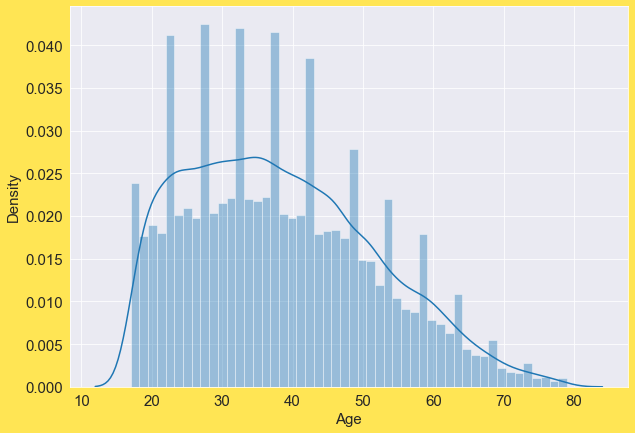

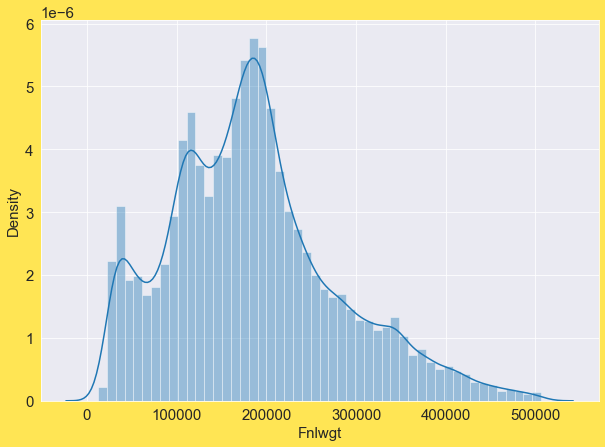

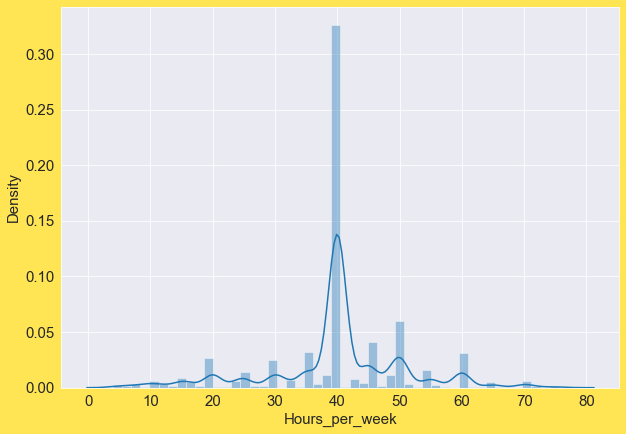

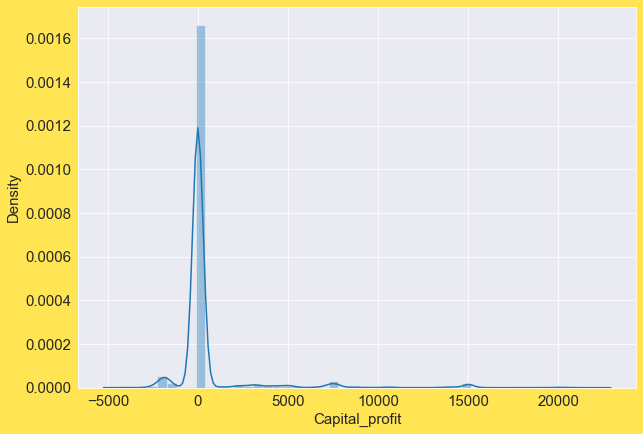

In [87]:
#Checking for skewness using boxplot
for i in cont_cols:
    sns.distplot(income_df[i])
    plt.show()

# We can see there are outliers in these continuoius columns

In [88]:
# we can see there is high amount of skewness present only in capital_profit column and a little skewness in fnlwgt

In [89]:
# Removing skewness from only capital_profit
skewed_cols = ['Fnlwgt','Capital_profit']

In [90]:
# using powertransformer
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

In [91]:
income_df[skewed_cols] = pt.fit_transform(income_df[skewed_cols].values)

In [92]:
# checking the skewness again
income_df[skewed_cols].skew().sort_values()

# We can see that the skewness has been removed from capital profit and fnlwgt as well

Capital_profit   -0.269305
Fnlwgt           -0.034586
dtype: float64

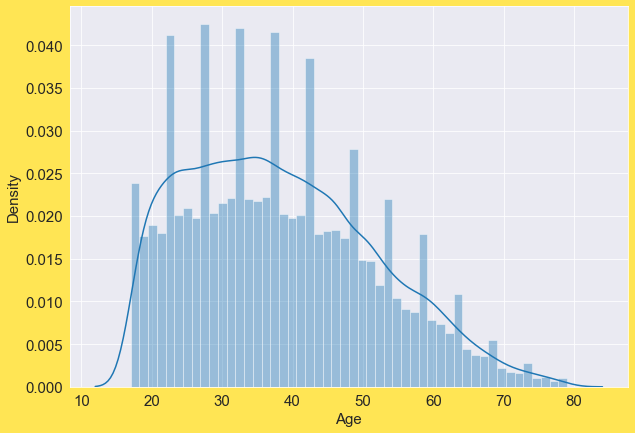

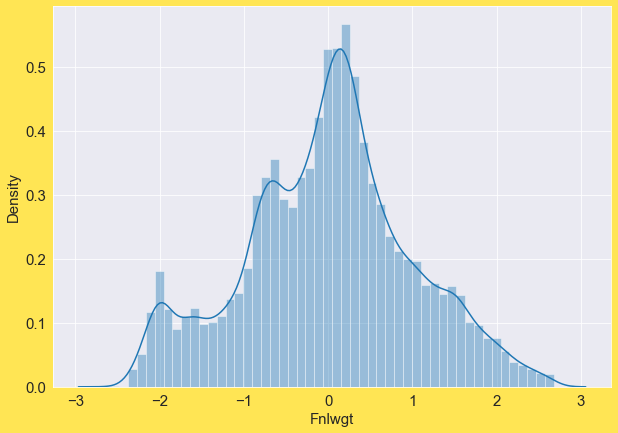

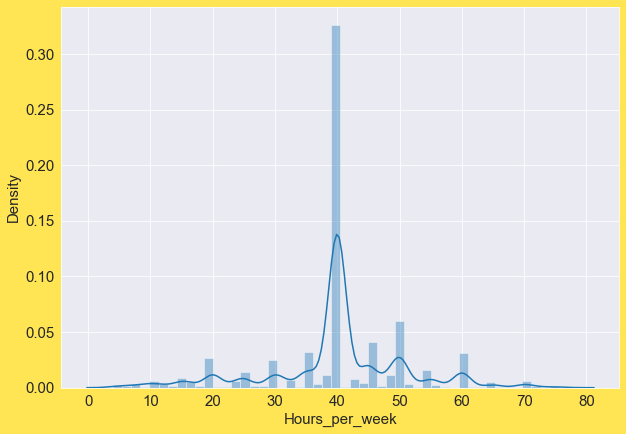

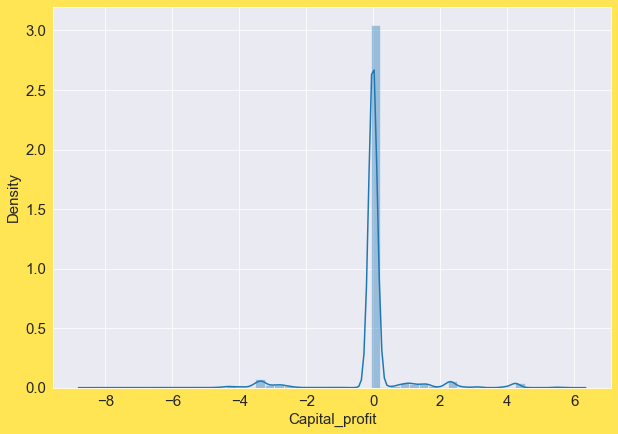

In [93]:
#Checking for skewness using boxplot
for i in cont_cols:
    sns.distplot(income_df[i])
    plt.show()

# We can see there are outliers in these continuoius columns

## Encoding the categorical variables

In [96]:
# looking at the categorical variables
cat_cols

['Workclass',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country']

In [97]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
income_df[cat_cols]= income_df[cat_cols].apply(LE.fit_transform)

In [98]:
income_df.head()

# We can see that the categorical variables are encoded

Age  Workclass    Fnlwgt  Education_num  Marital_status  Occupation  \
0   50          5 -1.116506             13               2           3   
1   38          3  0.423732              9               0           5   
2   53          3  0.603750              7               2           5   
3   28          3  1.483658             13               2           9   
4   37          3  1.045136             14               2           3   

   Relationship  Race  Sex  Hours_per_week  Native_country  Income  \
0             0     4    1              13              38       0   
1             1     4    1              40              38       0   
2             0     2    1              40              38       0   
3             5     2    0              40               4       0   
4             5     4    0              40              38       0   

   Capital_profit  
0       -0.010746  
1       -0.010746  
2       -0.010746  
3       -0.010746  
4       -0.010746

### Correlation

In [99]:
income_df.corr().T

Age  Workclass    Fnlwgt  Education_num  Marital_status  \
Age             1.000000   0.035795 -0.066147       0.036443       -0.284568   
Workclass       0.035795   1.000000 -0.022107       0.001028       -0.019199   
Fnlwgt         -0.066147  -0.022107  1.000000      -0.041154        0.027801   
Education_num   0.036443   0.001028 -0.041154       1.000000       -0.066738   
Marital_status -0.284568  -0.019199  0.027801      -0.066738        1.000000   
Occupation     -0.000312   0.006723  0.000594       0.068797        0.034145   
Relationship   -0.267544  -0.056609  0.007083      -0.094850        0.186766   
Race            0.027172   0.046163 -0.006874       0.033410       -0.067542   
Sex             0.090375   0.068766  0.027299       0.010485       -0.127807   
Hours_per_week  0.092790   0.028605 -0.015183       0.154004       -0.197001   
Native_country -0.003707  -0.001736 -0.066716       0.088089       -0.019359   
Income          0.241852  -0.000730 -0.005657       0.328970       -0.197878   
Capital_profit  0.042244   0.005281  0.003758       0.036355       -0.018219   

                Occupation  Relationship      Race       Sex  Hours_per_week  \
Age              -0.000312     -0.267544  0.027172  0.090375        0.092790   
Workclass         0.006723     -0.056609  0.046163  0.068766        0.028605   
Fnlwgt            0.000594      0.007083 -0.006874  0.027299       -0.015183   
Education_num     0.068797     -0.094850  0.033410  0.010485        0.154004   
Marital_status    0.034145      0.186766 -0.067542 -0.127807       -0.197001   
Occupation        1.000000     -0.036648 -0.003995  0.046422       -0.022232   
Relationship     -0.036648      1.000000 -0.115476 -0.582249       -0.260701   
Race             -0.003995     -0.115476  1.000000  0.089059        0.045535   
Sex               0.046422     -0.582249  0.089059  1.000000        0.237340   
Hours_per_week   -0.022232     -0.260701  0.045535  0.237340        1.000000   
Native_country   -0.002588     -0.009986  0.119271  0.001352        0.004438   
Income            0.032518     -0.250194  0.073001  0.214474        0.237298   
Capital_profit   -0.002016     -0.014063  0.001946  0.011961        0.018940   

                Native_country    Income  Capital_profit  
Age                  -0.003707  0.241852        0.042244  
Workclass            -0.001736 -0.000730        0.005281  
Fnlwgt               -0.066716 -0.005657        0.003758  
Education_num         0.088089  0.328970        0.036355  
Marital_status       -0.019359 -0.197878       -0.018219  
Occupation           -0.002588  0.032518       -0.002016  
Relationship         -0.009986 -0.250194       -0.014063  
Race                  0.119271  0.073001        0.001946  
Sex                   0.001352  0.214474        0.011961  
Hours_per_week        0.004438  0.237298        0.018940  
Native_country        1.000000  0.022156        0.000195  
Income                0.022156  1.000000        0.102215  
Capital_profit        0.000195  0.102215        1.000000

<AxesSubplot:>

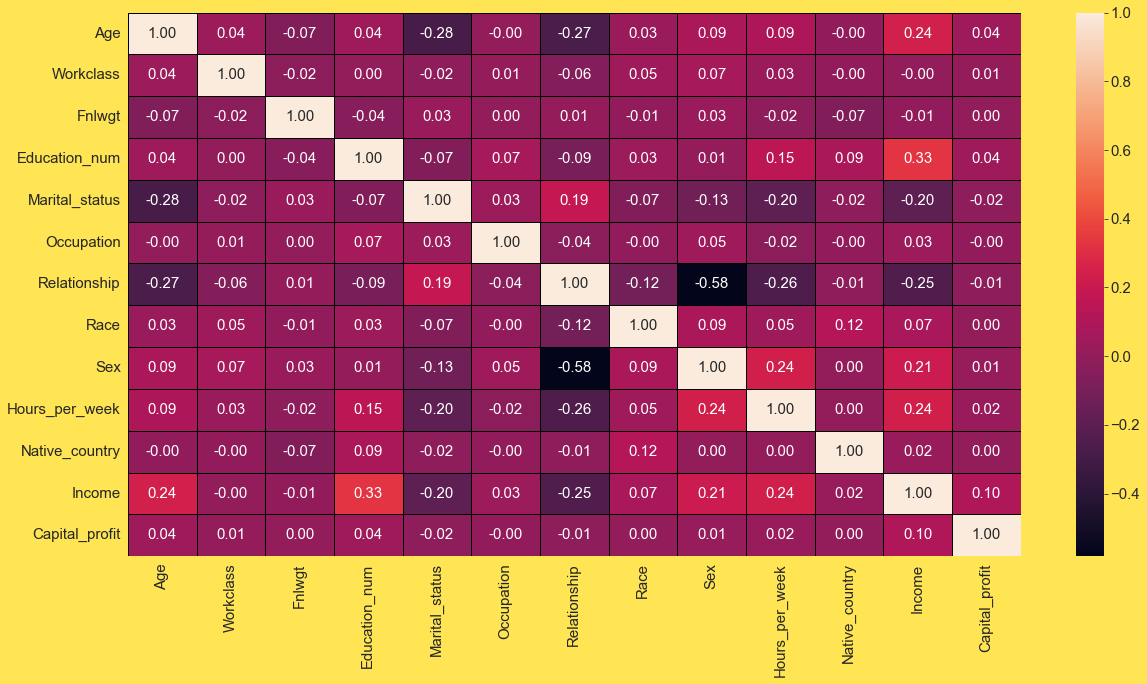

In [101]:
# plotting a heatmap
plt.figure(figsize=(20,10))
sns.heatmap(income_df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

In [100]:
# looking at the correlation of the features with respect to the target Income
income_df.corr()['Income'].sort_values()

Relationship     -0.250194
Marital_status   -0.197878
Fnlwgt           -0.005657
Workclass        -0.000730
Native_country    0.022156
Occupation        0.032518
Race              0.073001
Capital_profit    0.102215
Sex               0.214474
Hours_per_week    0.237298
Age               0.241852
Education_num     0.328970
Income            1.000000
Name: Income, dtype: float64

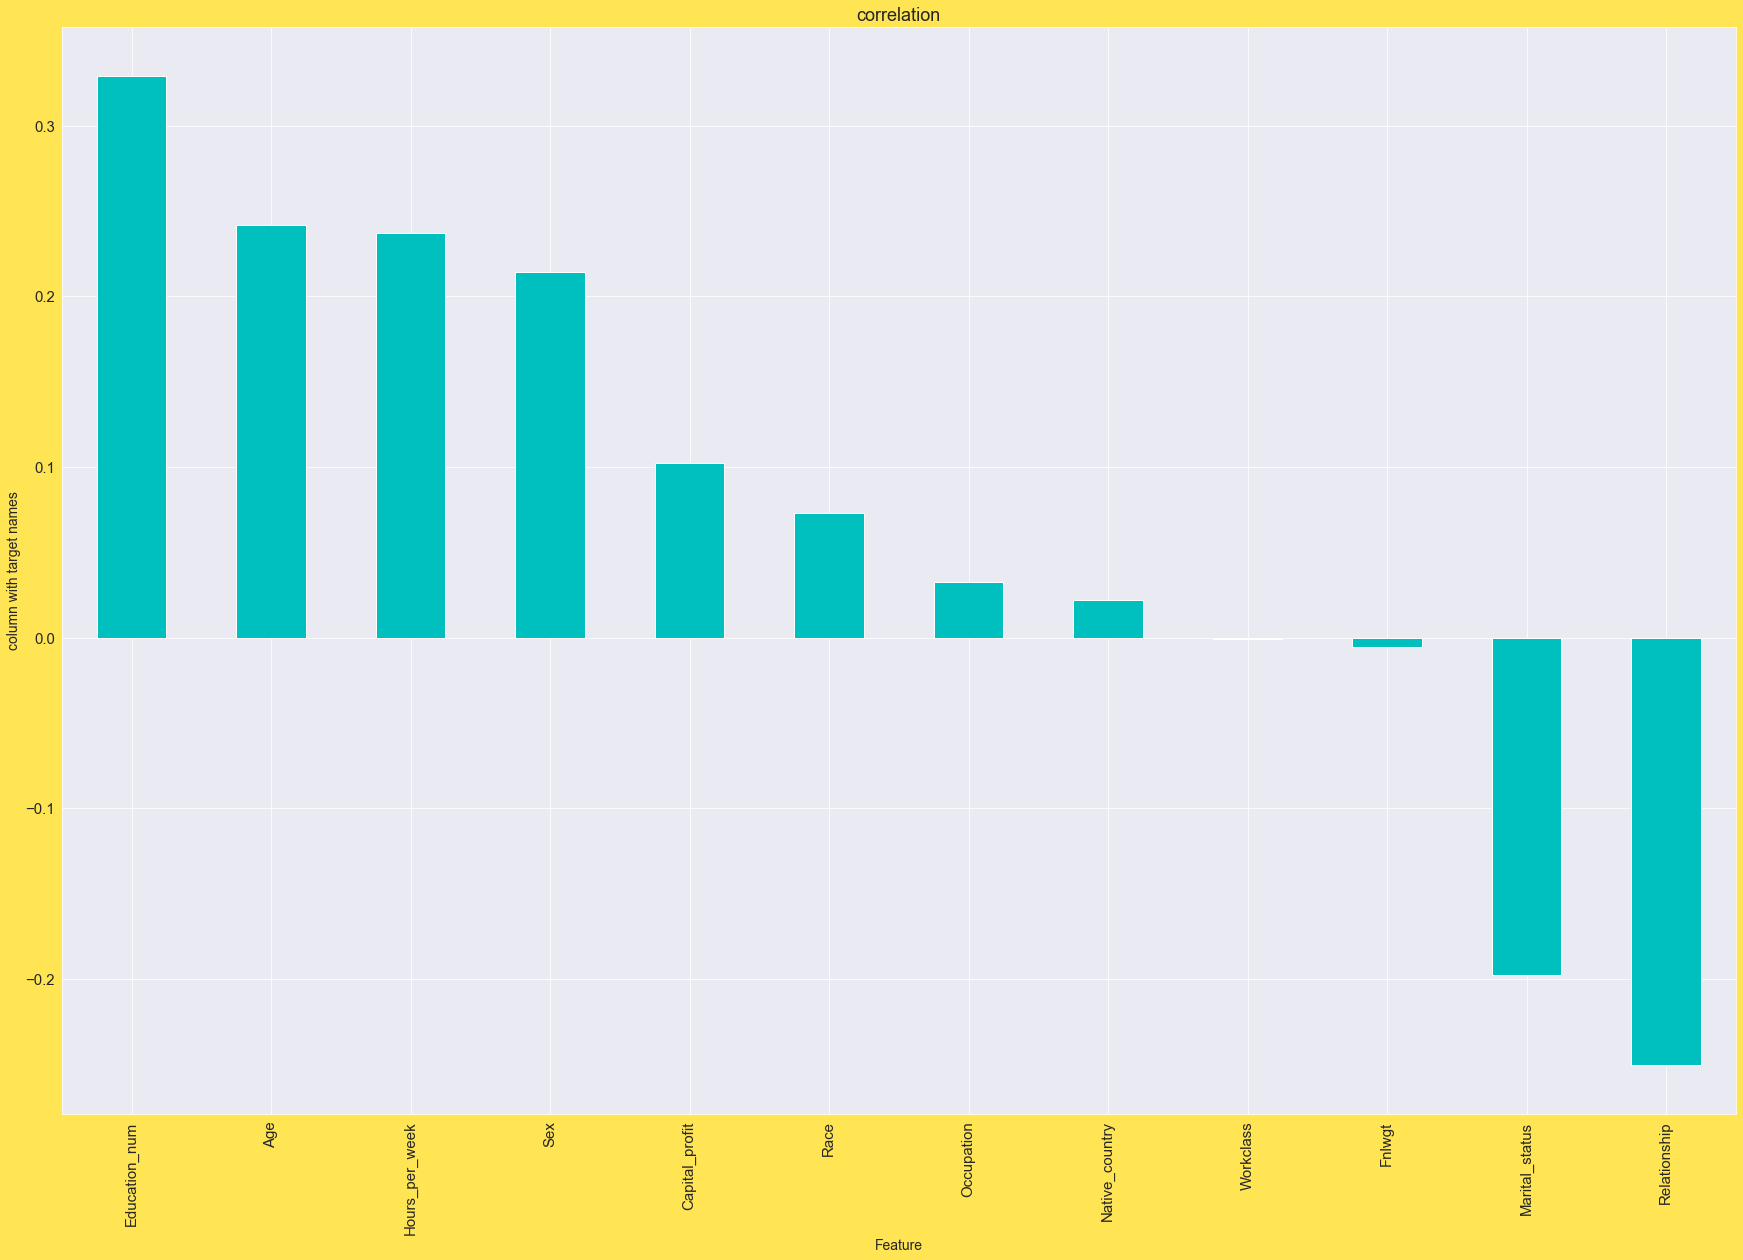

In [102]:
# plotting a bar graph to understand the same
plt.figure(figsize=(30,20))
income_df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [103]:
# dropping the Workclass as it is least correlated with the target
income_df.drop(['Workclass'],axis=1,inplace=True)

## SEPARATING THE FEATURES AND TARGET

In [105]:
x = income_df.drop("Income",axis=1)
y = income_df["Income"]

In [106]:
# We have to check the multicollonearity first before the model buildng
# Inorder to check the multicollinearity we need to scale the data first
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x = pd.DataFrame(sc.fit_transform(x),columns=x.columns)

## Checking Multicollinearity

In [107]:
# importing vif 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [108]:
def vif_calc():
    vif=pd.DataFrame()
    vif["vif_Features"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif["Features"]=x.columns
    return vif

In [109]:
vif_calc()

# We can clearly see there is no multicollinearity present in the features

vif_Features        Features
0       1.163715             Age
1       1.011504          Fnlwgt
2       1.050055   Education_num
3       1.137606  Marital_status
4       1.010840      Occupation
5       1.684582    Relationship
6       1.031296            Race
7       1.557268             Sex
8       1.135499  Hours_per_week
9       1.026497  Native_country
10      1.003281  Capital_profit

<AxesSubplot:xlabel='Income', ylabel='count'>

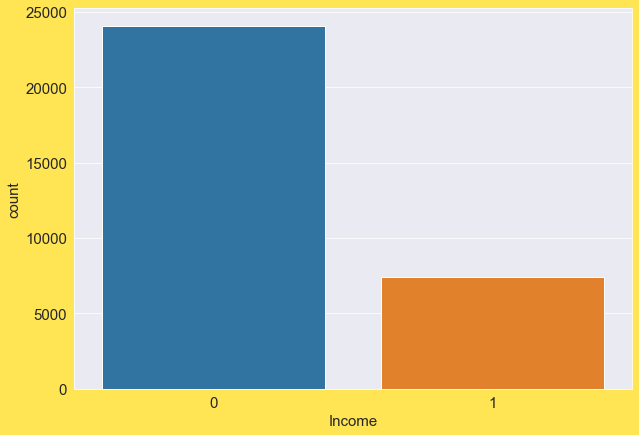

In [110]:
# Remember we have imbalance data in our target Income
sns.countplot(income_df['Income'])
# We can see that there are more categories of <=50k than >50k
# We have to balance the data

In [111]:
y.value_counts()

0    24029
1     7410
Name: Income, dtype: int64

## Treating the imbalance data

In [113]:
# Importing smote from imblearn
# here we are using oversampling methos
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

<AxesSubplot:xlabel='Income', ylabel='count'>

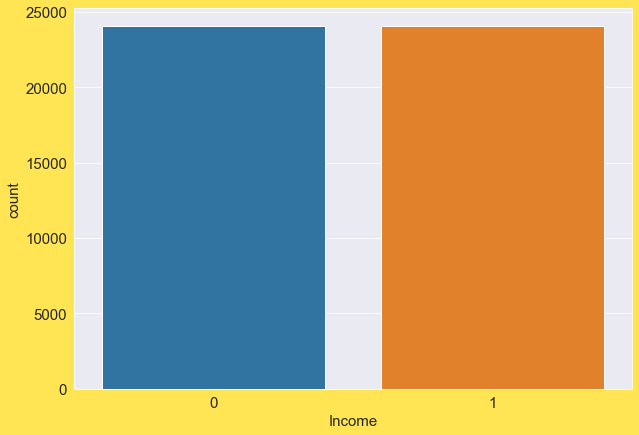

In [116]:
# checking the countplot again
sns.countplot(y)

# We can see that the data is now balanced

## Model Building

In [117]:
# importing all the necessary models and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [118]:
# Creating instances for models
lor = LogisticRegression()
svc = SVC()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
sgdc = SGDClassifier()
xgbc = XGBClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
etc = ExtraTreesClassifier()

## Logistic Regression

In [123]:
# finding the best random state for logistic regression
lor = LogisticRegression()
for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    lor.fit(x_train,y_train)
    pred_train = lor.predict(x_train)
    pred_test = lor.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1) == round(accuracy_score(y_test,pred_test)*100,1):
        print('At random state',i,'The model performs very well')
        print('At random state:-',i)
        print('Training accuracy score is ', round(accuracy_score(y_train,pred_train)*100,1))
        print('Testing accuracy score is ', round(accuracy_score(y_test,pred_test)*100,1), '\n\n')

At random state 9 The model performs very well
At random state:- 9
Training accuracy score is  75.3
Testing accuracy score is  75.3 


At random state 17 The model performs very well
At random state:- 17
Training accuracy score is  75.2
Testing accuracy score is  75.2 


At random state 50 The model performs very well
At random state:- 50
Training accuracy score is  75.2
Testing accuracy score is  75.2 


At random state 63 The model performs very well
At random state:- 63
Training accuracy score is  75.3
Testing accuracy score is  75.3 


At random state 67 The model performs very well
At random state:- 67
Training accuracy score is  75.3
Testing accuracy score is  75.3 


At random state 148 The model performs very well
At random state:- 148
Training accuracy score is  75.2
Testing accuracy score is  75.2 


At random state 162 The model performs very well
At random state:- 162
Training accuracy score is  75.3
Testing accuracy score is  75.3 


At random state 167 The model performs 

In [124]:
# We have got 75.3 accuracy at random state 67
# At random state 349 the model performs well
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=67) 

In [125]:
# Running the model with best random state
lor.fit(x_train,y_train)
pred_train_lor = lor.predict(x_train)
pred_test_lor = lor.predict(x_test)
print('Accuracy Score of lor: ',accuracy_score(y_test,pred_test_lor))
print('\n')
print(confusion_matrix(y_test,pred_test_lor))

# getting 75% accuracy with logistic reg

Accuracy Score of lor:  0.7528089887640449


[[5286 1876]
 [1688 5568]]


In [126]:
# lets check the cv score of lor
lss = accuracy_score(y_test,pred_test_lor) # creating an instance for acccuracy score
from sklearn.model_selection import cross_val_score

In [127]:
# running a for loop to find the best cv value which gives best score
for j in range(5,15):
    lsscore = cross_val_score(lor,x,y,cv=j)
    print(lsscore)
    lsc = lsscore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',lsc*100)
    print('accuracy_score is:- ',lss*100)
    print('\n')
    
# We can see that the cv score is almost same as the accuracy score
# So our model is running well

[0.74178111 0.75228881 0.7488556  0.76193944 0.75642493]
At cv:-  5
Cross validation score is:-  75.22579767868113
accuracy_score is:-  75.28089887640449


[0.74157303 0.74794007 0.74818976 0.75468165 0.76563866 0.7544013 ]
At cv:-  6
Cross validation score is:-  75.20707457335632
accuracy_score is:-  75.28089887640449


[0.74075153 0.75094669 0.7461404  0.75265841 0.75892207 0.76416606
 0.75294975]
At cv:-  7
Cross validation score is:-  75.23621300879178
accuracy_score is:-  75.28089887640449


[0.73518642 0.74983356 0.75245547 0.74762777 0.75378725 0.76277676
 0.7649409  0.752289  ]
At cv:-  8
Cross validation score is:-  75.23621395877025
accuracy_score is:-  75.28089887640449


[0.73520599 0.74606742 0.75280899 0.75131086 0.75037453 0.75299625
 0.76928839 0.76062933 0.75088968]
At cv:-  9
Cross validation score is:-  75.21746050564097
accuracy_score is:-  75.28089887640449


[0.73429047 0.74698294 0.75301706 0.75218477 0.74365377 0.75468165
 0.75988348 0.76258843 0.76191467 0.7521

In [128]:
# selecting cv = 8
lsscore_selected = cross_val_score(lor,x,y,cv=8).mean()
print('The cv score of logistcic Regression is ',lsscore_selected,'\nThe accuracy score of logistic regression is: ',lss)

# Accuracy is  75% for LOR

The cv score of logistcic Regression is  0.7523621395877025 
The accuracy score of logistic regression is:  0.7528089887640449


### Hyperparameter tuning all the models

## DecisionTreeClassifier

In [130]:
# creating a parameter grid to search best parameter using GridSearchCV
paramgrid_dtc = {'criterion':["gini", "entropy", "log_loss"],'splitter':["best", "random"],'min_samples_split':[2,3,4,5,6,7,8],'min_samples_leaf':[0.5,1,1.5,2,2.5,3,3.5,4]}
print(paramgrid_dtc)

{'criterion': ['gini', 'entropy', 'log_loss'], 'splitter': ['best', 'random'], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8], 'min_samples_leaf': [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]}


In [131]:
dtc_search = GridSearchCV(dtc,param_grid = paramgrid_dtc,error_score='raise')

In [132]:
# fitting the GRid to training data
dtc_search.fit(x_train,y_train)

GridSearchCV(error_score='raise', estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'splitter': ['best', 'random']})

In [133]:
print(dtc_search.best_score_) # bestscore
print(dtc_search.best_estimator_)
print(dtc_search.best_params_) # best params 

0.8548156956004755
DecisionTreeClassifier(criterion='entropy')
{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [134]:
# running the model using best parameters
dtc = DecisionTreeClassifier(criterion='entropy',splitter='best',min_samples_leaf=1,min_samples_split=2) 
# using the best parameters
dtc.fit(x_train,y_train)
pred_dtc_test= dtc.predict(x_test)
pred_dtc_train = dtc.predict(x_train)
print('Training score of dtc',accuracy_score(pred_dtc_train,y_train))
print('Accuracy Score of dtc',accuracy_score(pred_dtc_test,y_test))
print('Confusion Matrix of dtc',confusion_matrix(pred_dtc_test,y_test))
print('Classification report of Dtc',classification_report(pred_dtc_test,y_test))
print('\n')


# getting 85% with dtc

Training score of dtc 0.9999702734839477
Accuracy Score of dtc 0.8578859758635039
Confusion Matrix of dtc [[6158 1045]
 [1004 6211]]
Classification report of Dtc               precision    recall  f1-score   support

           0       0.86      0.85      0.86      7203
           1       0.86      0.86      0.86      7215

    accuracy                           0.86     14418
   macro avg       0.86      0.86      0.86     14418
weighted avg       0.86      0.86      0.86     14418





In [135]:
# Checking the cross validation of dtc
dtca = accuracy_score(pred_dtc_test,y_test)
for j in range(3,15):
    dtcscore = cross_val_score(dtc,x,y,cv=j)
    print(dtcscore)
    dsc = dtcscore.mean()
    print('At cv:- ',j)
    print('Cross validation score of DTC is:- ',dsc*100)
    print('accuracy_score of DTC is:- ',dtca*100)
    print('\n')

[0.77540574 0.88601036 0.88569823]
At cv:-  3
Cross validation score of DTC is:-  84.90381129545575
accuracy_score of DTC is:-  85.78859758635039


[0.77852684 0.86716604 0.89612119 0.88937906]
At cv:-  4
Cross validation score of DTC is:-  85.7798283400951
accuracy_score of DTC is:-  85.78859758635039


[0.77455264 0.83926342 0.89627549 0.90188326 0.89179066]
At cv:-  5
Cross validation score of DTC is:-  86.07530935063525
accuracy_score of DTC is:-  85.78859758635039


[0.77540574 0.80337079 0.89051186 0.90262172 0.90061181 0.89574229]
At cv:-  6
Cross validation score of DTC is:-  86.13773689992018
accuracy_score of DTC is:-  85.78859758635039


[0.76958928 0.7825517  0.88013399 0.89512017 0.90182083 0.90094683
 0.89963583]
At cv:-  7
Cross validation score of DTC is:-  86.13998069924429
accuracy_score of DTC is:-  85.78859758635039


[0.77413449 0.78195739 0.84884302 0.90194773 0.90044948 0.89945064
 0.90094889 0.89628766]
At cv:-  8
Cross validation score of DTC is:-  86.300241193

In [136]:
# the cv score at 3 and accuracy score is almost same, so we can say that the model is working well
# cv= 3 for DecisionTree
dtcscore_selected = cross_val_score(dtc,x,y,cv=3).mean()
print('The cv score of DecisionTree is ',dtcscore_selected,'\nThe accuracy score of DecisionTree is: ',dtca)

# DTC =  84%

The cv score of DecisionTree is  0.8480185241947783 
The accuracy score of DecisionTree is:  0.8578859758635039


## SupportVectorClassifier¶

In [142]:
# Creating parameter grid for  SVC
paramgrid_svc = {'C':[0.1,0.2,0.3],
                 'kernel':['rbf','poly','sigmoid'],
                 'degree':[3,4,5,6],'gamma':['scale','auto'],'decision_function_shape':['ovo','ovr']}
print(paramgrid_svc)

{'C': [0.1, 0.2, 0.3], 'kernel': ['rbf', 'poly', 'sigmoid'], 'degree': [3, 4, 5, 6], 'gamma': ['scale', 'auto'], 'decision_function_shape': ['ovo', 'ovr']}


In [143]:
svcs = GridSearchCV(svc,param_grid=paramgrid_svc,error_score='raise')

In [148]:
# running the model using the best params
svc = SVC(C=1.5,degree=3,gamma='auto',kernel='rbf',cache_size=150,decision_function_shape='ovo',shrinking=True) # using the best parameters
svc.fit(x_train,y_train)
pred_svc_test= svc.predict(x_test)
pred_svc_train = svc.predict(x_train)
print('Training score of svc',accuracy_score(pred_svc_train,y_train))
print('Accuracy Score of svc',accuracy_score(pred_svc_test,y_test))
print('Confusion Matrix of svc',confusion_matrix(pred_svc_test,y_test))
print('Classification report of svc',classification_report(pred_svc_test,y_test))
print('\n')


Training score of svc 0.8386444708680143
Accuracy Score of svc 0.836662505201831
Confusion Matrix of svc [[5526  719]
 [1636 6537]]
Classification report of svc               precision    recall  f1-score   support

           0       0.77      0.88      0.82      6245
           1       0.90      0.80      0.85      8173

    accuracy                           0.84     14418
   macro avg       0.84      0.84      0.84     14418
weighted avg       0.84      0.84      0.84     14418





In [ ]:
# checking the cv score
svca = accuracy_score(y_test,pred_svc_test) 
for j in range(5,10):
    svccore = cross_val_score(svc,x,y,cv=j)
    print(svccore)
    svcc = svccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',svcc*100)
    print('accuracy_score is:- ',svca*100)
    print('\n') # cv and accuracy is almost same

In [152]:
# selecting cv = 6
svcscore_selected = cross_val_score(svc,x,y,cv=6).mean()
print('The cv score of SVC is ',svcscore_selected,'\nThe accuracy score of SVC is: ',svca)


# 83% from SVC

The cv score of SVC is  0.8333890784644221 
The accuracy score of SVC is:  0.836662505201831


## KNeighborsClassifier

In [153]:
# paragrid for KNC
paramgrid_knc = {'n_neighbors':[x for x in range(5,10)],'algorithm':['auto','ball_tree','kd_tree'],
                 'leaf_size':[l for l in range(30,36)],'p':[2,3,4,6],}
# writing a list comprehension for leaf_size and n_neighbors instead of writing all the values

In [154]:
knc_search = GridSearchCV(knc,param_grid=paramgrid_knc)

In [159]:
# running the model using the best params
knc = KNeighborsClassifier(algorithm='auto',leaf_size=10,n_neighbors=6,p=3) # using the best parameters
knc.fit(x_train,y_train)
pred_knc_test= knc.predict(x_test)
pred_knc_train = knc.predict(x_train)
print('Training score of knc: ',accuracy_score(pred_knc_train,y_train))
print('Accuracy Score of knc: ',accuracy_score(pred_knc_test,y_test))
print('Confusion Matrix of knc: ',confusion_matrix(pred_knc_test,y_test))
print('Classification report of knc: ',classification_report(pred_knc_test,y_test))
print('\n')

# getting 74% accuracy

Training score of knc:  0.8936979785969085
Accuracy Score of knc:  0.8526841448189763
Confusion Matrix of knc:  [[5789  751]
 [1373 6505]]
Classification report of knc:                precision    recall  f1-score   support

           0       0.81      0.89      0.84      6540
           1       0.90      0.83      0.86      7878

    accuracy                           0.85     14418
   macro avg       0.85      0.86      0.85     14418
weighted avg       0.86      0.85      0.85     14418





In [160]:
# checking the cv score
knca = accuracy_score(y_test,pred_knc_test) 
for j in range(5,10):
    knccore = cross_val_score(knc,x,y,cv=j)
    print(knccore)
    kncc = knccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',kncc*100)
    print('accuracy_score is:- ',knca*100)
    print('\n') # cv and accuracy is almost same

[0.84051186 0.8491469  0.86308781 0.8635938  0.87066903]
At cv:-  5
Cross validation score is:-  85.7401878127837
accuracy_score is:-  85.26841448189762


[0.84032459 0.8443196  0.86828964 0.86167291 0.86802347 0.87027095]
At cv:-  6
Cross validation score is:-  85.88168600586513
accuracy_score is:-  85.26841448189762


[0.83993592 0.84255753 0.86134576 0.86525856 0.87050255 0.86977422
 0.87108521]
At cv:-  7
Cross validation score is:-  86.00656780936907
accuracy_score is:-  85.26841448189762


[0.83688415 0.84503995 0.84984185 0.86598968 0.86565673 0.86582321
 0.8743133  0.87081738]
At cv:-  8
Cross validation score is:-  85.9295781502805
accuracy_score is:-  85.26841448189762


[0.83726592 0.84007491 0.84775281 0.87359551 0.8664794  0.86722846
 0.86816479 0.87226072 0.86926391]
At cv:-  9
Cross validation score is:-  86.02318253148165
accuracy_score is:-  85.26841448189762




In [161]:
# selecting cv = 7 and we are getting accuracy and cv score almost same , which means our model is working well
kncscore_selected = cross_val_score(knc,x,y,cv=7).mean()
print('The cv score of KNeighborsC is ',kncscore_selected,'\nThe accuracy score of KNeighborsC is: ',knca)

# 85% accuracy from KNeighborsC

The cv score of KNeighborsC is  0.8600656780936907 
The accuracy score of KNeighborsC is:  0.8526841448189763


## SGDClassifier

In [162]:
# paramgrid
parametergrid_sgdc = {'loss':['hinge','log_loss','log','modified_huber','squared_hinge'],
                     'penalty':['l2','l1','elasticnet'],'alpha':[0.1,.001,0.0001]}

In [163]:
sgdc_search = GridSearchCV(sgdc,param_grid=parametergrid_sgdc)

In [164]:
# fitting the cv to train data
sgdc_search.fit(x_train,y_train)

GridSearchCV(estimator=SGDClassifier(),
             param_grid={'alpha': [0.1, 0.001, 0.0001],
                         'loss': ['hinge', 'log_loss', 'log', 'modified_huber',
                                  'squared_hinge'],
                         'penalty': ['l2', 'l1', 'elasticnet']})

In [165]:
# getting best prams 
print(sgdc_search.best_score_)
print(sgdc_search.best_estimator_)
print(sgdc_search.best_params_)

0.7553507728894173
SGDClassifier(alpha=0.1, loss='log', penalty='elasticnet')
{'alpha': 0.1, 'loss': 'log', 'penalty': 'elasticnet'}


In [166]:
# running the model using the best params
sgdc = SGDClassifier(alpha=0.1,loss='log',max_iter=1000,penalty='l2',l1_ratio=0.3,learning_rate='optimal') # using the best parameters
sgdc.fit(x_train,y_train)
pred_sgdc_test= sgdc.predict(x_test)
pred_sgdc_train = sgdc.predict(x_train)
print('Training score of SGDClassifier: ',accuracy_score(pred_sgdc_train,y_train))
print('Accuracy Score of SGDClassifier: ',accuracy_score(pred_sgdc_test,y_test))
print('Confusion Matrix of SGDClassifier: ',confusion_matrix(pred_sgdc_test,y_test))
print('Classification report of SGDClassifier: ',classification_report(pred_sgdc_test,y_test))
print('\n')

# sgdc is giving 71%

Training score of SGDClassifier:  0.7546076099881094
Accuracy Score of SGDClassifier:  0.7555139409071994
Confusion Matrix of SGDClassifier:  [[5203 1566]
 [1959 5690]]
Classification report of SGDClassifier:                precision    recall  f1-score   support

           0       0.73      0.77      0.75      6769
           1       0.78      0.74      0.76      7649

    accuracy                           0.76     14418
   macro avg       0.76      0.76      0.76     14418
weighted avg       0.76      0.76      0.76     14418





In [167]:
# checking the cv score
sgdca = accuracy_score(y_test,pred_sgdc_test) 
for j in range(4,10):
    sgdccore = cross_val_score(sgdc,x,y,cv=j)
    print(sgdccore)
    sgdcc = sgdccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',sgdcc*100)
    print('accuracy_score is:- ',sgdca*100)
    print('\n') # cv and accuracy is almost same

[0.74656679 0.75156055 0.75869819 0.76169469]
At cv:-  4
Cross validation score is:-  75.46300539507902
accuracy_score is:-  75.55139409071994


[0.7457345  0.75707449 0.74833541 0.76121111 0.76089897]
At cv:-  5
Cross validation score is:-  75.46508970054555
accuracy_score is:-  75.55139409071994


[0.74606742 0.7525593  0.74868914 0.75717853 0.76326633 0.76076913]
At cv:-  6
Cross validation score is:-  75.47549736883084
accuracy_score is:-  75.55139409071994


[0.74657734 0.75240315 0.74978153 0.75018208 0.76081573 0.76387473
 0.75804807]
At cv:-  7
Cross validation score is:-  75.4526089646952
accuracy_score is:-  75.55139409071994


[0.74134487 0.751498   0.75611786 0.74579657 0.75611786 0.76111204
 0.76743799 0.75561845]
At cv:-  8
Cross validation score is:-  75.43804552422972
accuracy_score is:-  75.55139409071994


[0.74194757 0.74850187 0.75599251 0.75617978 0.74662921 0.7571161
 0.76685393 0.76306424 0.7551976 ]
At cv:-  9
Cross validation score is:-  75.46092022856176
accur

In [168]:
# selecting cv = 6
sgdcscore_selected = cross_val_score(sgdc,x,y,cv=6).mean()
print('The cv score of SGDClassifier is ',sgdcscore_selected,'\nThe accuracy score of SGDClassifier is: ',sgdca)

# % with sgdc and cv score is almost same so our model is working well
# getting 75% accuracy after cv

The cv score of SGDClassifier is  0.7545885073009053 
The accuracy score of SGDClassifier is:  0.7555139409071994


## XGBClassifier

In [169]:
xgbc = XGBClassifier() 
xgbc.fit(x_train,y_train)
pred_xgbc_test= xgbc.predict(x_test)
pred_xgbc_train = xgbc.predict(x_train)
print('Training score of SGDClassifier: ',accuracy_score(pred_xgbc_train,y_train))
print('Accuracy Score of SGDClassifier: ',accuracy_score(pred_xgbc_test,y_test))
print('Confusion Matrix of SGDClassifier: ',confusion_matrix(pred_xgbc_test,y_test))
print('Classification report of SGDClassifier: ',classification_report(pred_xgbc_test,y_test))
print('\n')

Training score of SGDClassifier:  0.9313317479191439
Accuracy Score of SGDClassifier:  0.9029685115827438
Confusion Matrix of SGDClassifier:  [[6486  723]
 [ 676 6533]]
Classification report of SGDClassifier:                precision    recall  f1-score   support

           0       0.91      0.90      0.90      7209
           1       0.90      0.91      0.90      7209

    accuracy                           0.90     14418
   macro avg       0.90      0.90      0.90     14418
weighted avg       0.90      0.90      0.90     14418





In [170]:
# checking the cv score
xgbca = accuracy_score(y_test,pred_xgbc_test) 
for j in range(4,10):
    xgbccore = cross_val_score(xgbc,x,y,cv=j)
    print(xgbccore)
    xgbcc = xgbccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',xgbcc*100)
    print('accuracy_score is:- ',xgbca*100)
    print('\n') # cv and accuracy is almost same

[0.74273824 0.91210986 0.93557516 0.93457633]
At cv:-  4
Cross validation score is:-  88.12498991154793
accuracy_score is:-  90.29685115827438


[0.77257595 0.87650853 0.93726592 0.93840391 0.93569868]
At cv:-  5
Cross validation score is:-  89.20905972241113
accuracy_score is:-  90.29685115827438


[0.78114856 0.82097378 0.94057428 0.94007491 0.94306405 0.93744537]
At cv:-  6
Cross validation score is:-  89.38801604125447
accuracy_score is:-  90.29685115827438


[0.78604719 0.79289251 0.92309933 0.93678077 0.94348143 0.94624909
 0.94115076]
At cv:-  7
Cross validation score is:-  89.56715838303418
accuracy_score is:-  90.29685115827438


[0.78878162 0.7942743  0.88896288 0.94256701 0.94206759 0.94639587
 0.94689529 0.93940403]
At cv:-  8
Cross validation score is:-  89.86685729997205
accuracy_score is:-  90.29685115827438


[0.78970037 0.79644195 0.84494382 0.94138577 0.94250936 0.94625468
 0.94794007 0.94942873 0.93893988]
At cv:-  9
Cross validation score is:-  89.97271820351303
acc

In [171]:
# selecting cv = 10
xgbcscore_selected = cross_val_score(xgbc,x,y,cv=10).mean()
print('The cv score of XGBClassifier is ',xgbcscore_selected,'\nThe accuracy score of XGBClassifier is: ',xgbca)

# % with sgdc and cv score is almost same so our model is working well
# getting 90% accuracy after cv

The cv score of XGBClassifier is  0.9014749859588452 
The accuracy score of XGBClassifier is:  0.9029685115827438


### Ensemble Methods

## RandomForestClassifer

In [172]:
# framing the parameters
# no of trees in random forest
n_estimators = [100,200,300]

# method of measuring the quality of split 
criterion = ['gini','entropy','log_loss']

# features to consider for best split
max_features = ["sqrt", "log2", None]

# max depth of the tree
max_depth = [2,4,6]

class_weight = ["balanced", "balanced_subsample"]

bootstrap = [True,False]

In [173]:
# creating the paramgrid
param_grid = {'n_estimators':n_estimators,
             'criterion':criterion,
             'max_features':max_features,
             'max_depth':max_depth,
             'class_weight':class_weight,
             'bootstrap':bootstrap}
print(param_grid)

{'n_estimators': [100, 200, 300], 'criterion': ['gini', 'entropy', 'log_loss'], 'max_features': ['sqrt', 'log2', None], 'max_depth': [2, 4, 6], 'class_weight': ['balanced', 'balanced_subsample'], 'bootstrap': [True, False]}


In [174]:
rfc_search = GridSearchCV(rfc,param_grid=param_grid,error_score='raise')

In [175]:
rfc_search.fit(x_train,y_train)

GridSearchCV(error_score='raise', estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200, 300]})

In [176]:
print(rfc_search.best_score_)
print(rfc_search.best_estimator_)
print(rfc_search.best_params_) # we got the best score and best params

0.8347502972651604
RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=6)
{'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}


In [178]:
# running the model using the best params
rfc = RandomForestClassifier(criterion='gini',max_depth=6, max_features='log2',min_samples_leaf=3,min_samples_split=7,n_estimators=150,bootstrap=False,class_weight='balanced') # using the best parameters
rfc.fit(x_train,y_train)
pred_rfc_test= rfc.predict(x_test)
pred_rfc_train = rfc.predict(x_train)
print('Training score of RandomForestClassifier: ',accuracy_score(pred_rfc_train,y_train))
print('Accuracy Score of RandomForestClassifier: ',accuracy_score(pred_rfc_test,y_test))
print('Confusion Matrix of RandomForestClassifier: ',confusion_matrix(pred_rfc_test,y_test))
print('Classification report of RandomForestClassifier: ',classification_report(pred_rfc_test,y_test))
print('\n')

# getting 84% accuracy

Training score of RandomForestClassifier:  0.8386741973840666
Accuracy Score of RandomForestClassifier:  0.8418643362463587
Confusion Matrix of RandomForestClassifier:  [[5611  729]
 [1551 6527]]
Classification report of RandomForestClassifier:                precision    recall  f1-score   support

           0       0.78      0.89      0.83      6340
           1       0.90      0.81      0.85      8078

    accuracy                           0.84     14418
   macro avg       0.84      0.85      0.84     14418
weighted avg       0.85      0.84      0.84     14418





In [179]:
# checking the cv score
rfca = accuracy_score(y_test,pred_rfc_test) 
for j in range(4,10):
    rfccore = cross_val_score(rfc,x,y,cv=j)
    print(rfccore)
    rfcc = rfccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',rfcc*100)
    print('accuracy_score is:- ',rfca*100)
    print('\n') # cv and accuracy is almost same

[0.81581357 0.83412401 0.84251706 0.84334943]
At cv:-  4
Cross validation score is:-  83.39510167808801
accuracy_score is:-  84.18643362463587


[0.815335   0.82636288 0.84207241 0.84143169 0.84444907]
At cv:-  5
Cross validation score is:-  83.3930209753675
accuracy_score is:-  84.18643362463587


[0.81810237 0.81722846 0.84207241 0.84269663 0.8447996  0.8441753 ]
At cv:-  6
Cross validation score is:-  83.48457963983195
accuracy_score is:-  84.18643362463587


[0.81706962 0.8176522  0.83105156 0.8420976  0.84428259 0.84879825
 0.84501092]
At cv:-  7
Cross validation score is:-  83.5137534629569
accuracy_score is:-  84.18643362463587


[0.81374834 0.8180759  0.82820043 0.84051939 0.8483436  0.84101881
 0.84135176 0.84434826]
At cv:-  8
Cross validation score is:-  83.4450811048894
accuracy_score is:-  84.18643362463587


[0.81535581 0.81329588 0.82116105 0.84082397 0.84213483 0.8417603
 0.84550562 0.84435288 0.84322907]
At cv:-  9
Cross validation score is:-  83.41799330408693
accurac

In [180]:
# selecting cv = 7
# we are getting the cv score and accuracy almost same so our model is working well
rfcscore_selected = cross_val_score(rfc,x,y,cv=7).mean()
print('The cv score of RandomForestClassifier is ',rfcscore_selected,'\nThe accuracy score of RandomForestClassifier is: ',rfca)
# getting 84% with rfc

The cv score of RandomForestClassifier is  0.833347930687853 
The accuracy score of RandomForestClassifier is:  0.8418643362463587


### AdaBoostClassifier

In [181]:
parametergrid_abc = {'n_estimators':[x for x in range(50,61)],'algorithm':['SAMME','SAMME.R'],'learning_rate':[0.5,1.0,1.5]}

In [182]:
abc_search = GridSearchCV(abc,param_grid=parametergrid_abc,error_score='raise')

In [183]:
abc_search.fit(x_train,y_train)

GridSearchCV(error_score='raise', estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.5, 1.0, 1.5],
                         'n_estimators': [50, 51, 52, 53, 54, 55, 56, 57, 58,
                                          59, 60]})

In [184]:
print(abc_search.best_score_)
print(abc_search.best_estimator_)
print(abc_search.best_params_) # we got the best score and best params

0.8612663495838287
AdaBoostClassifier(learning_rate=1.5, n_estimators=60)
{'algorithm': 'SAMME.R', 'learning_rate': 1.5, 'n_estimators': 60}


In [185]:
# running the model using the best params
abc = AdaBoostClassifier(algorithm='SAMME.R',learning_rate=1.5,n_estimators=60) # using the best parameters
abc.fit(x_train,y_train)
pred_abc_test= abc.predict(x_test)
pred_abc_train = abc.predict(x_train)
print('Training score of AdaBoostClassifier: ',accuracy_score(pred_abc_train,y_train))
print('Accuracy Score of AdaBoostClassifier: ',accuracy_score(pred_abc_test,y_test))
print('Confusion Matrix of AdaBoostClassifier: ',confusion_matrix(pred_abc_test,y_test))
print('Classification report of AdaBoostClassifier: ',classification_report(pred_abc_test,y_test))
print('\n')

# we are getting 86% accuracy with AdaBoostClassifier

Training score of AdaBoostClassifier:  0.8633472057074911
Accuracy Score of AdaBoostClassifier:  0.8619087252046054
Confusion Matrix of AdaBoostClassifier:  [[6162  991]
 [1000 6265]]
Classification report of AdaBoostClassifier:                precision    recall  f1-score   support

           0       0.86      0.86      0.86      7153
           1       0.86      0.86      0.86      7265

    accuracy                           0.86     14418
   macro avg       0.86      0.86      0.86     14418
weighted avg       0.86      0.86      0.86     14418





In [186]:
# checking the cv score
abca = accuracy_score(y_test,pred_abc_test) 
for j in range(5,10):
    abccore = cross_val_score(abc,x,y,cv=j)
    print(abccore)
    abcc = abccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',abcc*100)
    print('accuracy_score is:- ',abca*100)
    print('\n') # cv and accuracy is almost same

[0.80753225 0.84831461 0.87401165 0.88096972 0.87441473]
At cv:-  5
Cross validation score is:-  85.70485931014422
accuracy_score is:-  86.19087252046054


[0.81285893 0.82883895 0.87428215 0.87790262 0.8815083  0.8722687 ]
At cv:-  6
Cross validation score is:-  85.79432745942755
accuracy_score is:-  86.19087252046054


[0.81095252 0.80614623 0.86192834 0.87545521 0.88638019 0.87662054
 0.87545521]
At cv:-  7
Cross validation score is:-  85.61340333557379
accuracy_score is:-  86.19087252046054


[0.80742344 0.81641145 0.85333777 0.87181621 0.87980689 0.87681039
 0.87897453 0.87747628]
At cv:-  8
Cross validation score is:-  85.7757120133036
accuracy_score is:-  86.19087252046054


[0.80486891 0.81385768 0.83389513 0.86985019 0.87490637 0.88370787
 0.8835206  0.88200037 0.87263532]
At cv:-  9
Cross validation score is:-  85.769360457136
accuracy_score is:-  86.19087252046054




In [187]:
# selecting cv = 6
# we are getting cv score and accuracy almost same, so our model is working well 77%
abcscore_selected = cross_val_score(abc,x,y,cv=6).mean()
print('The cv score of AdaBoostClassifier is ',abcscore_selected,'\nThe accuracy score of AdaBoostClassifier is: ',abca)

The cv score of AdaBoostClassifier is  0.8579432745942754 
The accuracy score of AdaBoostClassifier is:  0.8619087252046054


### Creating a dataframe to present all the models, accuracy and cv score

In [188]:
models = pd.DataFrame({'Model Name':['Logistic Regression','DecisionTreeClassifier','RandomForestClassifier','AdaBoostClassifier','KNeighborsClassifier','SGDClassifier','SupportVectorClassifier','XGBClassifier'],
                       'Accuracy':[lss,dtca,rfca,abca,knca,sgdca,svca,xgbca],
                       'CV_Score':[lsscore_selected,dtcscore_selected,rfcscore_selected,abcscore_selected,kncscore_selected,sgdcscore_selected,svcscore_selected,xgbcscore_selected]})
models


# 

Model Name  Accuracy  CV_Score
0      Logistic Regression  0.752809  0.752362
1   DecisionTreeClassifier  0.857886  0.848019
2   RandomForestClassifier  0.841864  0.833348
3       AdaBoostClassifier  0.861909  0.857943
4     KNeighborsClassifier  0.852684  0.860066
5            SGDClassifier  0.755514  0.754589
6  SupportVectorClassifier  0.836663  0.833389
7            XGBClassifier  0.902969  0.901475

### Plotting AUCROC plot

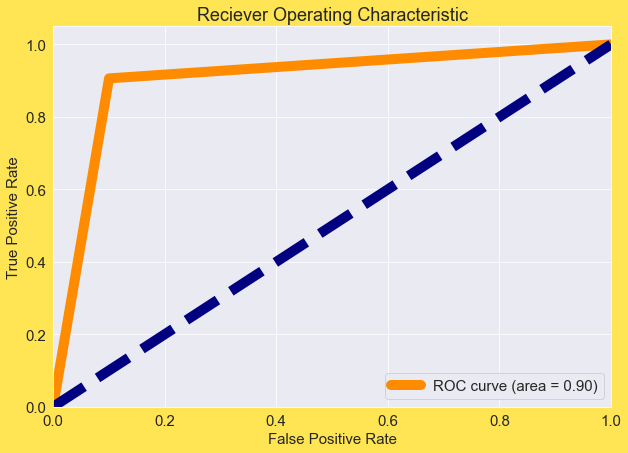

In [189]:
# plotting a auc roc with respect to XGBClassifier
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred_xgbc_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color = 'darkorange',lw=10,label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color = 'navy',lw = 10, linestyle = '--')
plt.xlim([0.0,1.0]) # limitation
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic')
plt.legend(loc='lower right') 
plt.show()

# we can say that our model is working 90% 

## SAVING THE MODEL

In [190]:
import pickle
filename = 'income_pred.pkl'
pickle.dump(xgbc,open(filename, 'wb'))

In [191]:
import numpy as np
a = np.array(y_test)
predicted = np.array(xgbc.predict(x_test))
df_com = pd.DataFrame({'Original':a,'Predicted':predicted},index = range(len(a)))
df_com.sample(20)
# comparison of predicted and original value

Original  Predicted
884           1          1
4608          0          0
14112         0          0
6921          0          0
1203          0          0
9660          0          0
3977          1          1
1973          0          0
8030          1          1
12419         0          0
12253         0          0
13454         1          0
9403          1          0
9727          1          1
4391          0          0
10954         1          1
685           1          1
1795          1          1
10530         0          0
2570          1          1